<a href="https://colab.research.google.com/github/DanielPinillaVillalobos/EstadisticaInferencial/blob/main/Lista_Anova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATOS ORIGINALES:
      Grupo  Tiempo
0   Grupo 1     250
1   Grupo 1     260
2   Grupo 1     245
3   Grupo 1     255
4   Grupo 1     248
5   Grupo 1     252
6   Grupo 1     258
7   Grupo 1     261
8   Grupo 1     249
9   Grupo 1     257
10  Grupo 2     265
11  Grupo 2     270
12  Grupo 2     260
13  Grupo 2     275
14  Grupo 2     268
15  Grupo 2     267
16  Grupo 2     272
17  Grupo 2     269
18  Grupo 2     271
19  Grupo 2     266
20  Grupo 3     240
21  Grupo 3     235
22  Grupo 3     242
23  Grupo 3     238
24  Grupo 3     236
25  Grupo 3     239
26  Grupo 3     241
27  Grupo 3     237
28  Grupo 3     243
29  Grupo 3     240

ESTADÍSTICAS DESCRIPTIVAS:
Grupo 1:
  Media: 253.5000 ms
  Desviación estándar: 5.4823 ms
  n = 10
Grupo 2:
  Media: 268.3000 ms
  Desviación estándar: 4.1647 ms
  n = 10
Grupo 3:
  Media: 239.1000 ms
  Desviación estándar: 2.6013 ms
  n = 10

Media Global: 253.6333 ms
N total: 30

TABLA ANOVA DE UNA VÍA
Fuente de Variación                 SC     gl          

/tmp/ipython-input-450859389.py:157: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[1].boxplot(datos, labels=grupos, patch_artist=True,


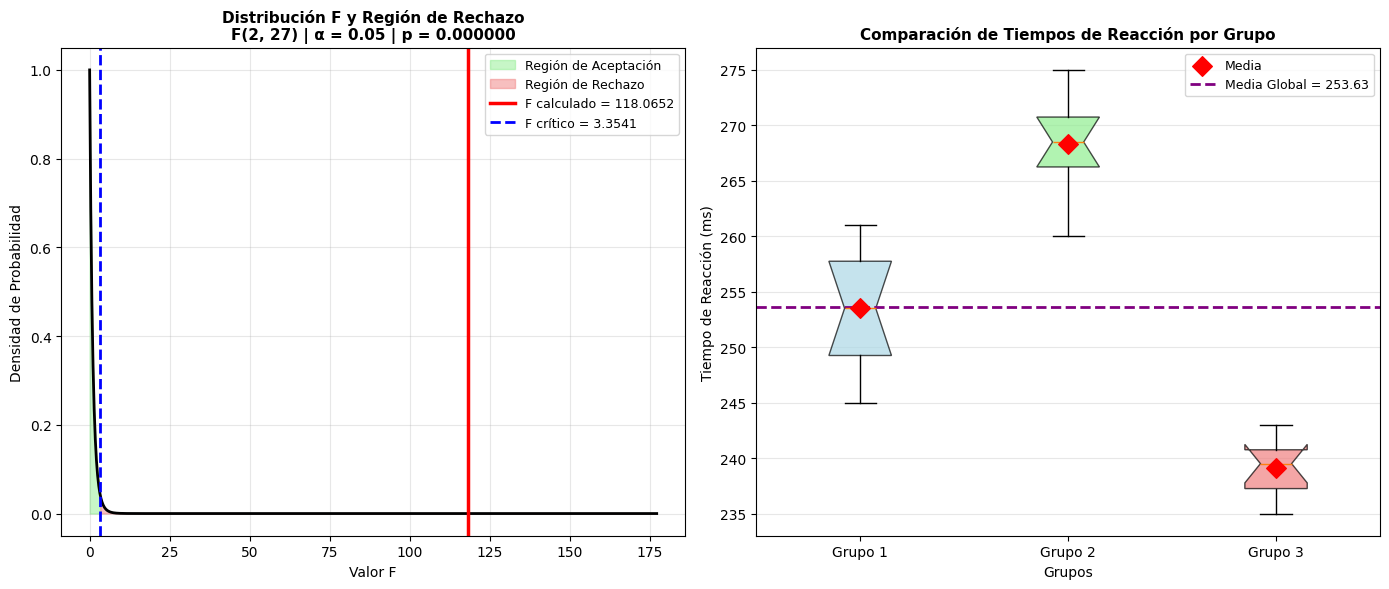


ANÁLISIS COMPLETO FINALIZADO


In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# ============================================================================
# DATOS DEL PROBLEMA
# ============================================================================

# Tiempos de reacción en milisegundos
grupo1 = [250, 260, 245, 255, 248, 252, 258, 261, 249, 257]
grupo2 = [265, 270, 260, 275, 268, 267, 272, 269, 271, 266]
grupo3 = [240, 235, 242, 238, 236, 239, 241, 237, 243, 240]

# Crear DataFrame
data = {
    'Grupo': ['Grupo 1'] * 10 + ['Grupo 2'] * 10 + ['Grupo 3'] * 10,
    'Tiempo': grupo1 + grupo2 + grupo3
}

df = pd.DataFrame(data)
grupos = df['Grupo'].unique()

# ============================================================================
# CÁLCULOS PRELIMINARES
# ============================================================================

datos = [df[df['Grupo'] == g]['Tiempo'].values for g in grupos]
n_grupos = len(grupos)
n_obs = [len(g) for g in datos]
n_total = sum(n_obs)

media_global = df['Tiempo'].mean()
medias_grupo = df.groupby('Grupo')['Tiempo'].mean().values

print("DATOS ORIGINALES:")
print(df)
print("\n" + "="*80)
print("ESTADÍSTICAS DESCRIPTIVAS:")
print("="*80)
for i, grupo in enumerate(grupos):
    print(f"{grupo}:")
    print(f"  Media: {medias_grupo[i]:.4f} ms")
    print(f"  Desviación estándar: {np.std(datos[i], ddof=1):.4f} ms")
    print(f"  n = {n_obs[i]}")
print(f"\nMedia Global: {media_global:.4f} ms")
print(f"N total: {n_total}\n")

# ============================================================================
# ANOVA DE UNA VÍA MANUAL
# ============================================================================

# Suma de Cuadrados Total
SCT = np.sum((df['Tiempo'] - media_global)**2)

# Suma de Cuadrados Entre Grupos (Between)
SCB = sum([n_obs[i]*(medias_grupo[i] - media_global)**2 for i in range(n_grupos)])

# Suma de Cuadrados Error (Within)
SCE = SCT - SCB

# Grados de libertad
gl_b = n_grupos - 1  # Entre grupos
gl_e = n_total - n_grupos  # Error
gl_t = n_total - 1  # Total

# Cuadrados Medios
CMb = SCB / gl_b
CMe = SCE / gl_e

# Estadístico F
F = CMb / CMe
p_value = 1 - stats.f.cdf(F, gl_b, gl_e)
F_crit = stats.f.ppf(0.95, gl_b, gl_e)

# ============================================================================
# TABLA ANOVA
# ============================================================================

print("="*80)
print("TABLA ANOVA DE UNA VÍA")
print("="*80)
print(f"{'Fuente de Variación':<25} {'SC':>12} {'gl':>6} {'CM':>12} {'F':>12} {'Valor-p':>12}")
print("-"*80)
print(f"{'Entre Grupos':<25} {SCB:>12.4f} {gl_b:>6} {CMb:>12.4f} {F:>12.4f} {p_value:>12.6f}")
print(f"{'Dentro de Grupos (Error)':<25} {SCE:>12.4f} {gl_e:>6} {CMe:>12.4f}")
print(f"{'Total':<25} {SCT:>12.4f} {gl_t:>6}")
print("="*80)

# ============================================================================
# INTERPRETACIÓN
# ============================================================================

alpha = 0.05
print(f"\nINTERPRETACIÓN (α = {alpha}):")
print("-"*80)
print(f"F calculado = {F:.4f}")
print(f"F crítico (F_{{{gl_b},{gl_e}}}) = {F_crit:.4f}")
print(f"Valor-p = {p_value:.6f}")
print()

if p_value < alpha:
    print("DECISIÓN: RECHAZAR H₀")
    print("✓ Existen diferencias significativas entre los tiempos medios de")
    print("  reacción de los tres grupos (p < 0.05).")
    print()
    print("CONCLUSIÓN: Los diferentes estímulos visuales SÍ afectan significativamente")
    print("            el tiempo de reacción de las personas.")
else:
    print("DECISIÓN: NO RECHAZAR H₀")
    print("✗ No hay evidencia suficiente de diferencias significativas entre")
    print("  los tiempos medios de reacción de los tres grupos (p ≥ 0.05).")
    print()
    print("CONCLUSIÓN: Los diferentes estímulos visuales NO afectan significativamente")
    print("            el tiempo de reacción de las personas.")

print()

# ============================================================================
# VERIFICACIÓN CON SCIPY
# ============================================================================

F_scipy, p_scipy = stats.f_oneway(grupo1, grupo2, grupo3)
print("="*80)
print("VERIFICACIÓN CON scipy.stats.f_oneway:")
print(f"  F = {F_scipy:.4f}")
print(f"  p-value = {p_scipy:.6f}")
print("="*80)

# ============================================================================
# GRÁFICOS
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Región de Rechazo
x = np.linspace(0, max(F, F_crit)*1.5, 1000)
y = stats.f.pdf(x, gl_b, gl_e)

axes[0].plot(x, y, 'k-', linewidth=2)
axes[0].fill_between(x[x <= F_crit], y[x <= F_crit], color='lightgreen',
                      alpha=0.5, label='Región de Aceptación')
axes[0].fill_between(x[x >= F_crit], y[x >= F_crit], color='lightcoral',
                      alpha=0.5, label='Región de Rechazo')
axes[0].axvline(F, color='red', linewidth=2.5, linestyle='-',
                label=f'F calculado = {F:.4f}')
axes[0].axvline(F_crit, color='blue', linestyle='--', linewidth=2,
                label=f'F crítico = {F_crit:.4f}')
axes[0].set_title(f'Distribución F y Región de Rechazo\nF({gl_b}, {gl_e}) | α = 0.05 | p = {p_value:.6f}',
                  fontsize=11, fontweight='bold')
axes[0].set_xlabel('Valor F', fontsize=10)
axes[0].set_ylabel('Densidad de Probabilidad', fontsize=10)
axes[0].legend(fontsize=9)
axes[0].grid(alpha=0.3)

# Gráfico 2: Box Plot de los grupos
bp = axes[1].boxplot(datos, labels=grupos, patch_artist=True,
                      notch=True, showmeans=True)
colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

axes[1].scatter([1, 2, 3], medias_grupo, color='red', s=100, zorder=5,
                label='Media', marker='D')
axes[1].axhline(media_global, color='purple', linestyle='--', linewidth=2,
                label=f'Media Global = {media_global:.2f}')
axes[1].set_title('Comparación de Tiempos de Reacción por Grupo',
                  fontsize=11, fontweight='bold')
axes[1].set_xlabel('Grupos', fontsize=10)
axes[1].set_ylabel('Tiempo de Reacción (ms)', fontsize=10)
axes[1].legend(fontsize=9)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("ANÁLISIS COMPLETO FINALIZADO")
print("="*80)

DATOS ORIGINALES:
  Método  Calificación
Método A            78
Método A            80
Método A            76
Método A            82
Método A            79
Método A            81
Método A            77
Método A            80
Método A            83
Método A            79
Método A            78
Método A            80
Método B            85
Método B            88
Método B            84
Método B            87
Método B            86
Método B            89
Método B            90
Método B            85
Método B            87
Método B            88
Método B            86
Método B            87
Método C            70
Método C            72
Método C            68
Método C            71
Método C            69
Método C            73
Método C            70
Método C            72
Método C            71
Método C            70
Método C            69
Método C            71

ESTADÍSTICAS DESCRIPTIVAS:
Método A:
  Media: 79.4167
  Desviación estándar: 2.0207
  Mínimo: 76
  Máximo: 83
  n = 12

Método B:


/tmp/ipython-input-3890196550.py:168: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax2.boxplot(datos, labels=metodos, patch_artist=True,


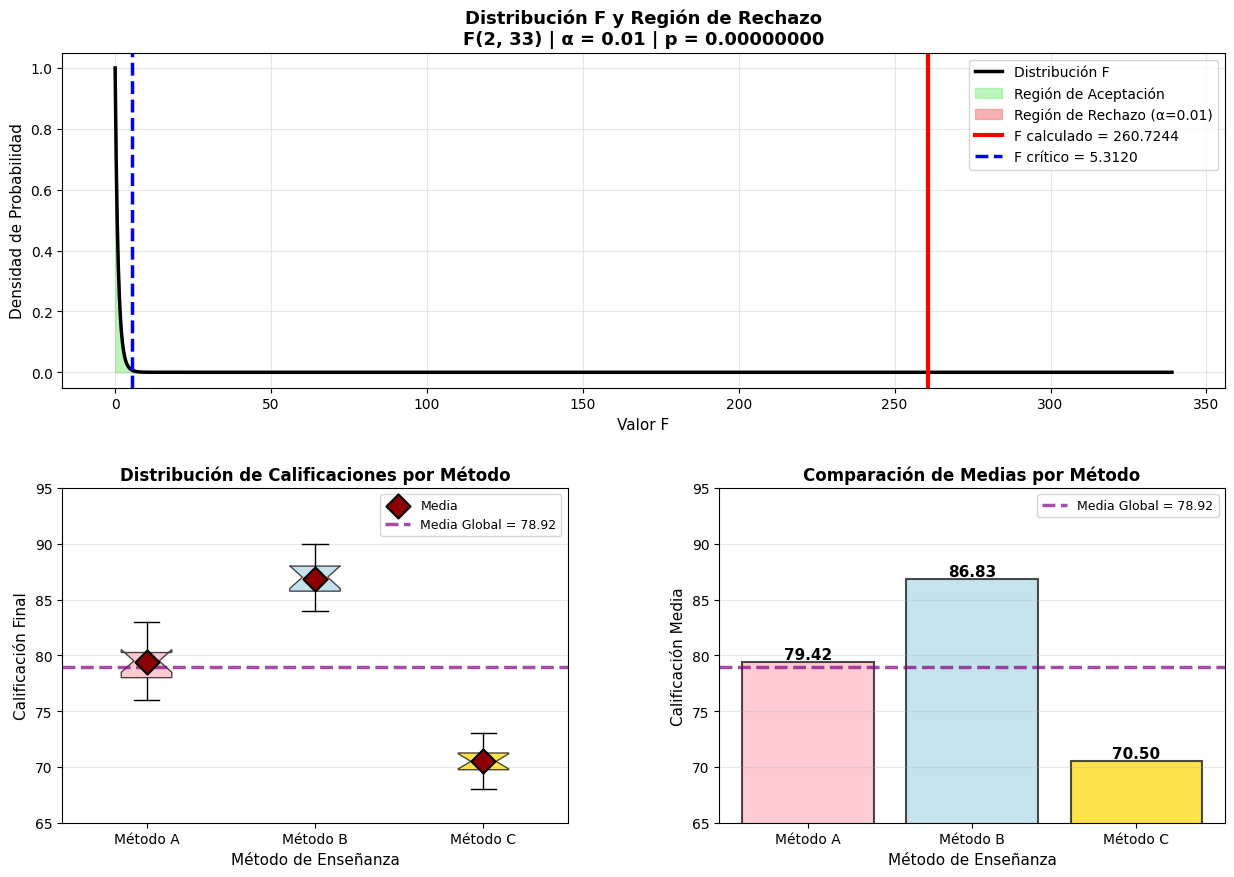


ANÁLISIS COMPLETO FINALIZADO


In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# ============================================================================
# DATOS DEL PROBLEMA
# ============================================================================

# Calificaciones finales por método de enseñanza
metodo_A = [78, 80, 76, 82, 79, 81, 77, 80, 83, 79, 78, 80]
metodo_B = [85, 88, 84, 87, 86, 89, 90, 85, 87, 88, 86, 87]
metodo_C = [70, 72, 68, 71, 69, 73, 70, 72, 71, 70, 69, 71]

# Crear DataFrame
data = {
    'Método': ['Método A'] * 12 + ['Método B'] * 12 + ['Método C'] * 12,
    'Calificación': metodo_A + metodo_B + metodo_C
}

df = pd.DataFrame(data)
metodos = df['Método'].unique()

# ============================================================================
# CÁLCULOS PRELIMINARES
# ============================================================================

datos = [df[df['Método'] == m]['Calificación'].values for m in metodos]
n_grupos = len(metodos)
n_obs = [len(g) for g in datos]
n_total = sum(n_obs)

media_global = df['Calificación'].mean()
medias_metodo = df.groupby('Método')['Calificación'].mean().values

print("DATOS ORIGINALES:")
print(df.to_string(index=False))
print("\n" + "="*80)
print("ESTADÍSTICAS DESCRIPTIVAS:")
print("="*80)
for i, metodo in enumerate(metodos):
    print(f"{metodo}:")
    print(f"  Media: {medias_metodo[i]:.4f}")
    print(f"  Desviación estándar: {np.std(datos[i], ddof=1):.4f}")
    print(f"  Mínimo: {np.min(datos[i]):.0f}")
    print(f"  Máximo: {np.max(datos[i]):.0f}")
    print(f"  n = {n_obs[i]}")
    print()
print(f"Media Global: {media_global:.4f}")
print(f"N total: {n_total}\n")

# ============================================================================
# ANOVA DE UNA VÍA MANUAL
# ============================================================================

# Suma de Cuadrados Total
SCT = np.sum((df['Calificación'] - media_global)**2)

# Suma de Cuadrados Entre Grupos (Between)
SCB = sum([n_obs[i]*(medias_metodo[i] - media_global)**2 for i in range(n_grupos)])

# Suma de Cuadrados Error (Within)
SCE = SCT - SCB

# Grados de libertad
gl_b = n_grupos - 1  # Entre grupos
gl_e = n_total - n_grupos  # Error
gl_t = n_total - 1  # Total

# Cuadrados Medios
CMb = SCB / gl_b
CMe = SCE / gl_e

# Estadístico F
F = CMb / CMe
p_value = 1 - stats.f.cdf(F, gl_b, gl_e)
F_crit = stats.f.ppf(0.99, gl_b, gl_e)  # α = 0.01

# ============================================================================
# TABLA ANOVA
# ============================================================================

print("="*80)
print("TABLA ANOVA DE UNA VÍA")
print("="*80)
print(f"{'Fuente de Variación':<25} {'SC':>12} {'gl':>6} {'CM':>12} {'F':>12} {'Valor-p':>12}")
print("-"*80)
print(f"{'Entre Métodos':<25} {SCB:>12.4f} {gl_b:>6} {CMb:>12.4f} {F:>12.4f} {p_value:>12.6f}")
print(f"{'Dentro de Métodos (Error)':<25} {SCE:>12.4f} {gl_e:>6} {CMe:>12.4f}")
print(f"{'Total':<25} {SCT:>12.4f} {gl_t:>6}")
print("="*80)

# ============================================================================
# INTERPRETACIÓN
# ============================================================================

alpha = 0.01
print(f"\nINTERPRETACIÓN (α = {alpha}):")
print("-"*80)
print(f"F calculado = {F:.4f}")
print(f"F crítico (F_{{{gl_b},{gl_e}}}) = {F_crit:.4f}")
print(f"Valor-p = {p_value:.8f}")
print()

if p_value < alpha:
    print("DECISIÓN: RECHAZAR H₀")
    print("✓ Existen diferencias ALTAMENTE significativas entre las calificaciones")
    print("  medias de los tres métodos de enseñanza (p < 0.01).")
    print()
    print("CONCLUSIÓN: Los diferentes métodos de enseñanza SÍ afectan significativamente")
    print("            el rendimiento académico de los estudiantes.")
    print()
    print("OBSERVACIONES:")
    print(f"  • Método B tiene la media más alta: {medias_metodo[1]:.2f}")
    print(f"  • Método C tiene la media más baja: {medias_metodo[2]:.2f}")
    print(f"  • Diferencia entre el mejor y peor método: {medias_metodo[1] - medias_metodo[2]:.2f} puntos")
else:
    print("DECISIÓN: NO RECHAZAR H₀")
    print("✗ No hay evidencia suficiente de diferencias significativas entre")
    print("  las calificaciones medias de los tres métodos (p ≥ 0.01).")
    print()
    print("CONCLUSIÓN: Los diferentes métodos de enseñanza NO afectan significativamente")
    print("            el rendimiento académico de los estudiantes.")

print()

# ============================================================================
# VERIFICACIÓN CON SCIPY
# ============================================================================

F_scipy, p_scipy = stats.f_oneway(metodo_A, metodo_B, metodo_C)
print("="*80)
print("VERIFICACIÓN CON scipy.stats.f_oneway:")
print(f"  F = {F_scipy:.4f}")
print(f"  p-value = {p_scipy:.8f}")
print("="*80)

# ============================================================================
# GRÁFICOS
# ============================================================================

fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

# Gráfico 1: Región de Rechazo
ax1 = fig.add_subplot(gs[0, :])
x = np.linspace(0, max(F, F_crit)*1.3, 1000)
y = stats.f.pdf(x, gl_b, gl_e)

ax1.plot(x, y, 'k-', linewidth=2.5, label='Distribución F')
ax1.fill_between(x[x <= F_crit], y[x <= F_crit], color='lightgreen',
                  alpha=0.6, label='Región de Aceptación')
ax1.fill_between(x[x >= F_crit], y[x >= F_crit], color='lightcoral',
                  alpha=0.6, label='Región de Rechazo (α=0.01)')
ax1.axvline(F, color='red', linewidth=3, linestyle='-',
            label=f'F calculado = {F:.4f}')
ax1.axvline(F_crit, color='blue', linestyle='--', linewidth=2.5,
            label=f'F crítico = {F_crit:.4f}')
ax1.set_title(f'Distribución F y Región de Rechazo\nF({gl_b}, {gl_e}) | α = 0.01 | p = {p_value:.8f}',
              fontsize=13, fontweight='bold')
ax1.set_xlabel('Valor F', fontsize=11)
ax1.set_ylabel('Densidad de Probabilidad', fontsize=11)
ax1.legend(fontsize=10, loc='upper right')
ax1.grid(alpha=0.3)

# Gráfico 2: Box Plot
ax2 = fig.add_subplot(gs[1, 0])
bp = ax2.boxplot(datos, labels=metodos, patch_artist=True,
                  notch=True, showmeans=True)
colors = ['#FFB6C1', '#ADD8E6', '#FFD700']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax2.scatter([1, 2, 3], medias_metodo, color='darkred', s=150, zorder=5,
            label='Media', marker='D', edgecolors='black', linewidths=1.5)
ax2.axhline(media_global, color='purple', linestyle='--', linewidth=2.5,
            label=f'Media Global = {media_global:.2f}', alpha=0.7)
ax2.set_title('Distribución de Calificaciones por Método',
              fontsize=12, fontweight='bold')
ax2.set_xlabel('Método de Enseñanza', fontsize=11)
ax2.set_ylabel('Calificación Final', fontsize=11)
ax2.legend(fontsize=9)
ax2.grid(axis='y', alpha=0.3)
ax2.set_ylim([65, 95])

# Gráfico 3: Gráfico de Barras con Medias
ax3 = fig.add_subplot(gs[1, 1])
x_pos = np.arange(len(metodos))
bars = ax3.bar(x_pos, medias_metodo, color=colors, alpha=0.7,
               edgecolor='black', linewidth=1.5)
ax3.axhline(media_global, color='purple', linestyle='--', linewidth=2.5,
            label=f'Media Global = {media_global:.2f}', alpha=0.7)

# Agregar valores en las barras
for i, (bar, media) in enumerate(zip(bars, medias_metodo)):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{media:.2f}',
             ha='center', va='bottom', fontweight='bold', fontsize=11)

ax3.set_xlabel('Método de Enseñanza', fontsize=11)
ax3.set_ylabel('Calificación Media', fontsize=11)
ax3.set_title('Comparación de Medias por Método', fontsize=12, fontweight='bold')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(metodos)
ax3.legend(fontsize=9)
ax3.grid(axis='y', alpha=0.3)
ax3.set_ylim([65, 95])

plt.show()

print("\n" + "="*80)
print("ANÁLISIS COMPLETO FINALIZADO")
print("="*80)

DATOS ORIGINALES:
  Fertilizante  Altura
Fertilizante 1      15
Fertilizante 1      16
Fertilizante 1      14
Fertilizante 1      17
Fertilizante 1      15
Fertilizante 1      16
Fertilizante 1      14
Fertilizante 1      15
Fertilizante 2      18
Fertilizante 2      17
Fertilizante 2      19
Fertilizante 2      18
Fertilizante 2      17
Fertilizante 2      20
Fertilizante 2      19
Fertilizante 2      18
Fertilizante 3      16
Fertilizante 3      15
Fertilizante 3      16
Fertilizante 3      15
Fertilizante 3      16
Fertilizante 3      15
Fertilizante 3      16
Fertilizante 3      15
Fertilizante 4      20
Fertilizante 4      21
Fertilizante 4      19
Fertilizante 4      20
Fertilizante 4      22
Fertilizante 4      21
Fertilizante 4      20
Fertilizante 4      19

ESTADÍSTICAS DESCRIPTIVAS:
Fertilizante 1:
  Media: 15.2500 cm
  Desviación estándar: 1.0351 cm
  Mínimo: 14 cm
  Máximo: 17 cm
  Mediana: 15.00 cm
  n = 8

Fertilizante 2:
  Media: 18.2500 cm
  Desviación estándar: 1.0351

/tmp/ipython-input-1080934681.py:175: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax2.boxplot(datos, labels=['Fert. 1', 'Fert. 2', 'Fert. 3', 'Fert. 4'],


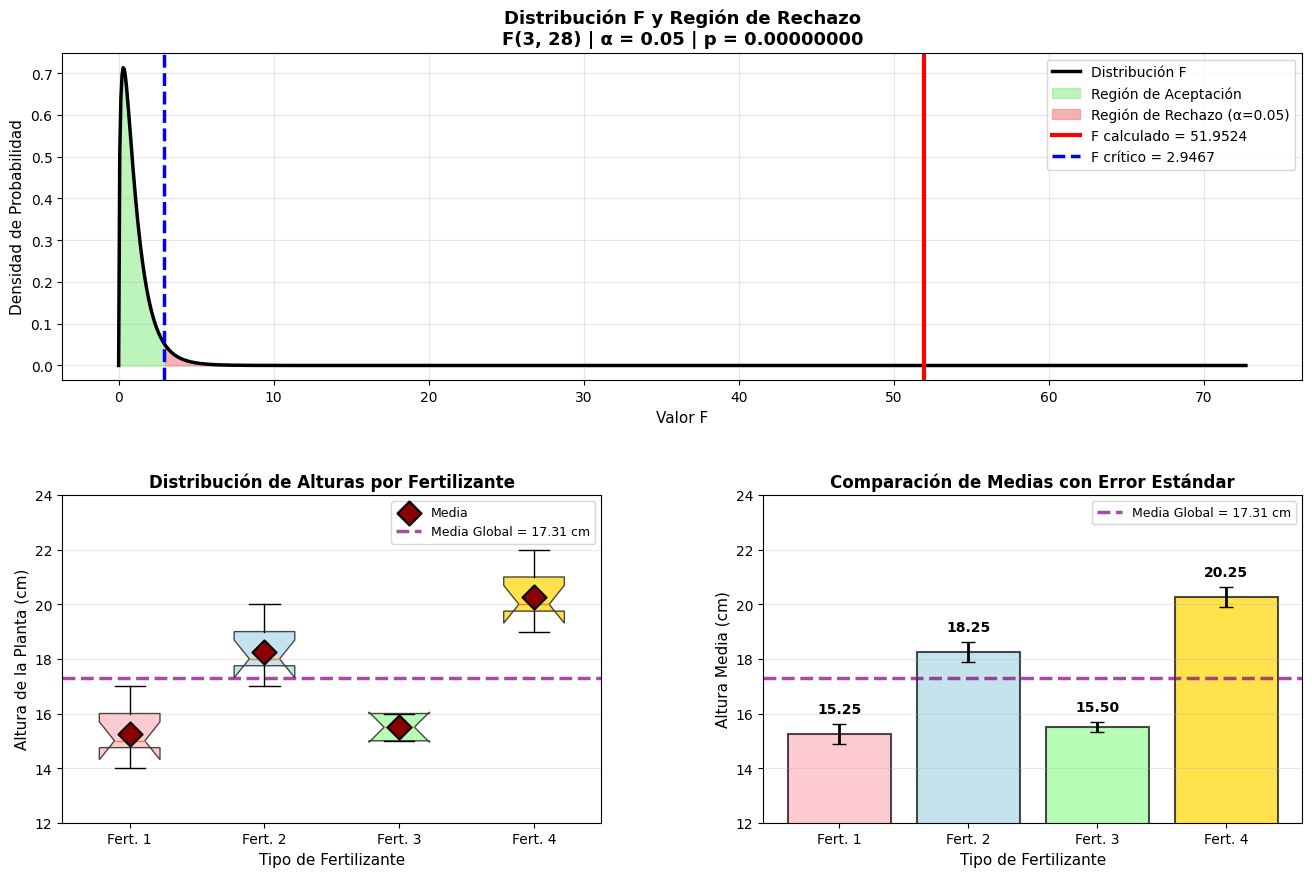


ANÁLISIS COMPLETO FINALIZADO


In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# ============================================================================
# DATOS DEL PROBLEMA
# ============================================================================

# Alturas de plantas (en cm) por tipo de fertilizante
fertilizante_1 = [15, 16, 14, 17, 15, 16, 14, 15]
fertilizante_2 = [18, 17, 19, 18, 17, 20, 19, 18]
fertilizante_3 = [16, 15, 16, 15, 16, 15, 16, 15]
fertilizante_4 = [20, 21, 19, 20, 22, 21, 20, 19]

# Crear DataFrame
data = {
    'Fertilizante': ['Fertilizante 1'] * 8 + ['Fertilizante 2'] * 8 +
                    ['Fertilizante 3'] * 8 + ['Fertilizante 4'] * 8,
    'Altura': fertilizante_1 + fertilizante_2 + fertilizante_3 + fertilizante_4
}

df = pd.DataFrame(data)
fertilizantes = df['Fertilizante'].unique()

# ============================================================================
# CÁLCULOS PRELIMINARES
# ============================================================================

datos = [df[df['Fertilizante'] == f]['Altura'].values for f in fertilizantes]
n_grupos = len(fertilizantes)
n_obs = [len(g) for g in datos]
n_total = sum(n_obs)

media_global = df['Altura'].mean()
medias_fertilizante = df.groupby('Fertilizante')['Altura'].mean().values

print("DATOS ORIGINALES:")
print(df.to_string(index=False))
print("\n" + "="*80)
print("ESTADÍSTICAS DESCRIPTIVAS:")
print("="*80)
for i, fert in enumerate(fertilizantes):
    print(f"{fert}:")
    print(f"  Media: {medias_fertilizante[i]:.4f} cm")
    print(f"  Desviación estándar: {np.std(datos[i], ddof=1):.4f} cm")
    print(f"  Mínimo: {np.min(datos[i]):.0f} cm")
    print(f"  Máximo: {np.max(datos[i]):.0f} cm")
    print(f"  Mediana: {np.median(datos[i]):.2f} cm")
    print(f"  n = {n_obs[i]}")
    print()
print(f"Media Global: {media_global:.4f} cm")
print(f"N total: {n_total}\n")

# ============================================================================
# ANOVA DE UNA VÍA MANUAL
# ============================================================================

# Suma de Cuadrados Total
SCT = np.sum((df['Altura'] - media_global)**2)

# Suma de Cuadrados Entre Grupos (Between)
SCB = sum([n_obs[i]*(medias_fertilizante[i] - media_global)**2 for i in range(n_grupos)])

# Suma de Cuadrados Error (Within)
SCE = SCT - SCB

# Grados de libertad
gl_b = n_grupos - 1  # Entre grupos
gl_e = n_total - n_grupos  # Error
gl_t = n_total - 1  # Total

# Cuadrados Medios
CMb = SCB / gl_b
CMe = SCE / gl_e

# Estadístico F
F = CMb / CMe
p_value = 1 - stats.f.cdf(F, gl_b, gl_e)
F_crit = stats.f.ppf(0.95, gl_b, gl_e)  # α = 0.05

# ============================================================================
# TABLA ANOVA
# ============================================================================

print("="*80)
print("TABLA ANOVA DE UNA VÍA")
print("="*80)
print(f"{'Fuente de Variación':<25} {'SC':>12} {'gl':>6} {'CM':>12} {'F':>12} {'Valor-p':>12}")
print("-"*80)
print(f"{'Entre Fertilizantes':<25} {SCB:>12.4f} {gl_b:>6} {CMb:>12.4f} {F:>12.4f} {p_value:>12.8f}")
print(f"{'Dentro (Error)':<25} {SCE:>12.4f} {gl_e:>6} {CMe:>12.4f}")
print(f"{'Total':<25} {SCT:>12.4f} {gl_t:>6}")
print("="*80)

# ============================================================================
# INTERPRETACIÓN
# ============================================================================

alpha = 0.05
print(f"\nINTERPRETACIÓN (α = {alpha}):")
print("-"*80)
print(f"Hipótesis Nula (H₀): Las medias de altura son iguales para todos los fertilizantes")
print(f"Hipótesis Alternativa (H₁): Al menos una media difiere de las demás")
print()
print(f"F calculado = {F:.4f}")
print(f"F crítico (F_{{{gl_b},{gl_e}}}) = {F_crit:.4f}")
print(f"Valor-p = {p_value:.8f}")
print()

if p_value < alpha:
    print("DECISIÓN: RECHAZAR H₀")
    print("✓ Existen diferencias SIGNIFICATIVAS entre las alturas medias de plantas")
    print("  según el tipo de fertilizante utilizado (p < 0.05).")
    print()
    print("CONCLUSIÓN: Los diferentes fertilizantes SÍ afectan significativamente")
    print("            el crecimiento de las plantas.")
    print()
    print("RANKING DE EFICACIA (de mayor a menor altura media):")
    ranking = sorted(zip(fertilizantes, medias_fertilizante), key=lambda x: x[1], reverse=True)
    for i, (fert, media) in enumerate(ranking, 1):
        print(f"  {i}. {fert}: {media:.4f} cm")
else:
    print("DECISIÓN: NO RECHAZAR H₀")
    print("✗ No hay evidencia suficiente de diferencias significativas entre")
    print("  las alturas medias según el tipo de fertilizante (p ≥ 0.05).")
    print()
    print("CONCLUSIÓN: Los diferentes fertilizantes NO afectan significativamente")
    print("            el crecimiento de las plantas.")

print()

# ============================================================================
# VERIFICACIÓN CON SCIPY
# ============================================================================

F_scipy, p_scipy = stats.f_oneway(fertilizante_1, fertilizante_2,
                                   fertilizante_3, fertilizante_4)
print("="*80)
print("VERIFICACIÓN CON scipy.stats.f_oneway:")
print(f"  F = {F_scipy:.4f}")
print(f"  p-value = {p_scipy:.8f}")
print("="*80)

# ============================================================================
# GRÁFICOS
# ============================================================================

fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 2, hspace=0.35, wspace=0.3)

# Gráfico 1: Región de Rechazo
ax1 = fig.add_subplot(gs[0, :])
x = np.linspace(0, max(F, F_crit)*1.4, 1000)
y = stats.f.pdf(x, gl_b, gl_e)

ax1.plot(x, y, 'k-', linewidth=2.5, label='Distribución F')
ax1.fill_between(x[x <= F_crit], y[x <= F_crit], color='lightgreen',
                  alpha=0.6, label='Región de Aceptación')
ax1.fill_between(x[x >= F_crit], y[x >= F_crit], color='lightcoral',
                  alpha=0.6, label='Región de Rechazo (α=0.05)')
ax1.axvline(F, color='red', linewidth=3, linestyle='-',
            label=f'F calculado = {F:.4f}')
ax1.axvline(F_crit, color='blue', linestyle='--', linewidth=2.5,
            label=f'F crítico = {F_crit:.4f}')
ax1.set_title(f'Distribución F y Región de Rechazo\nF({gl_b}, {gl_e}) | α = 0.05 | p = {p_value:.8f}',
              fontsize=13, fontweight='bold')
ax1.set_xlabel('Valor F', fontsize=11)
ax1.set_ylabel('Densidad de Probabilidad', fontsize=11)
ax1.legend(fontsize=10, loc='upper right')
ax1.grid(alpha=0.3)

# Gráfico 2: Box Plot
ax2 = fig.add_subplot(gs[1, 0])
bp = ax2.boxplot(datos, labels=['Fert. 1', 'Fert. 2', 'Fert. 3', 'Fert. 4'],
                  patch_artist=True, notch=True, showmeans=True)
colors = ['#FFB6C1', '#ADD8E6', '#98FB98', '#FFD700']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax2.scatter([1, 2, 3, 4], medias_fertilizante, color='darkred', s=150, zorder=5,
            label='Media', marker='D', edgecolors='black', linewidths=1.5)
ax2.axhline(media_global, color='purple', linestyle='--', linewidth=2.5,
            label=f'Media Global = {media_global:.2f} cm', alpha=0.7)
ax2.set_title('Distribución de Alturas por Fertilizante',
              fontsize=12, fontweight='bold')
ax2.set_xlabel('Tipo de Fertilizante', fontsize=11)
ax2.set_ylabel('Altura de la Planta (cm)', fontsize=11)
ax2.legend(fontsize=9)
ax2.grid(axis='y', alpha=0.3)
ax2.set_ylim([12, 24])

# Gráfico 3: Gráfico de Barras con Medias y Error Estándar
ax3 = fig.add_subplot(gs[1, 1])
x_pos = np.arange(len(fertilizantes))
errores = [np.std(d, ddof=1)/np.sqrt(len(d)) for d in datos]  # Error estándar
bars = ax3.bar(x_pos, medias_fertilizante, color=colors, alpha=0.7,
               edgecolor='black', linewidth=1.5, yerr=errores,
               capsize=5, error_kw={'linewidth': 2})
ax3.axhline(media_global, color='purple', linestyle='--', linewidth=2.5,
            label=f'Media Global = {media_global:.2f} cm', alpha=0.7)

# Agregar valores en las barras
for i, (bar, media) in enumerate(zip(bars, medias_fertilizante)):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + errores[i] + 0.3,
             f'{media:.2f}',
             ha='center', va='bottom', fontweight='bold', fontsize=10)

ax3.set_xlabel('Tipo de Fertilizante', fontsize=11)
ax3.set_ylabel('Altura Media (cm)', fontsize=11)
ax3.set_title('Comparación de Medias con Error Estándar', fontsize=12, fontweight='bold')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(['Fert. 1', 'Fert. 2', 'Fert. 3', 'Fert. 4'])
ax3.legend(fontsize=9)
ax3.grid(axis='y', alpha=0.3)
ax3.set_ylim([12, 24])

plt.show()

print("\n" + "="*80)
print("ANÁLISIS COMPLETO FINALIZADO")
print("="*80)

DATOS ORIGINALES:
  Técnica  Concentración
Técnica 1             30
Técnica 1             32
Técnica 1             31
Técnica 1             29
Técnica 1             30
Técnica 1             33
Técnica 1             32
Técnica 1             31
Técnica 1             30
Técnica 2             35
Técnica 2             36
Técnica 2             34
Técnica 2             35
Técnica 2             37
Técnica 2             36
Técnica 2             34
Técnica 2             35
Técnica 2             36
Técnica 3             28
Técnica 3             27
Técnica 3             29
Técnica 3             28
Técnica 3             30
Técnica 3             29
Técnica 3             28
Técnica 3             27
Técnica 3             28

ESTADÍSTICAS DESCRIPTIVAS:
Técnica 1:
  Media: 30.8889
  Desviación estándar: 1.2693
  Varianza: 1.6111
  Mínimo: 29
  Máximo: 33
  Mediana: 31.00
  Rango: 4
  n = 9

Técnica 2:
  Media: 35.3333
  Desviación estándar: 1.0000
  Varianza: 1.0000
  Mínimo: 34
  Máximo: 37
  Mediana: 

/tmp/ipython-input-3503560935.py:195: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax2.boxplot(datos, labels=['Técnica 1', 'Técnica 2', 'Técnica 3'],


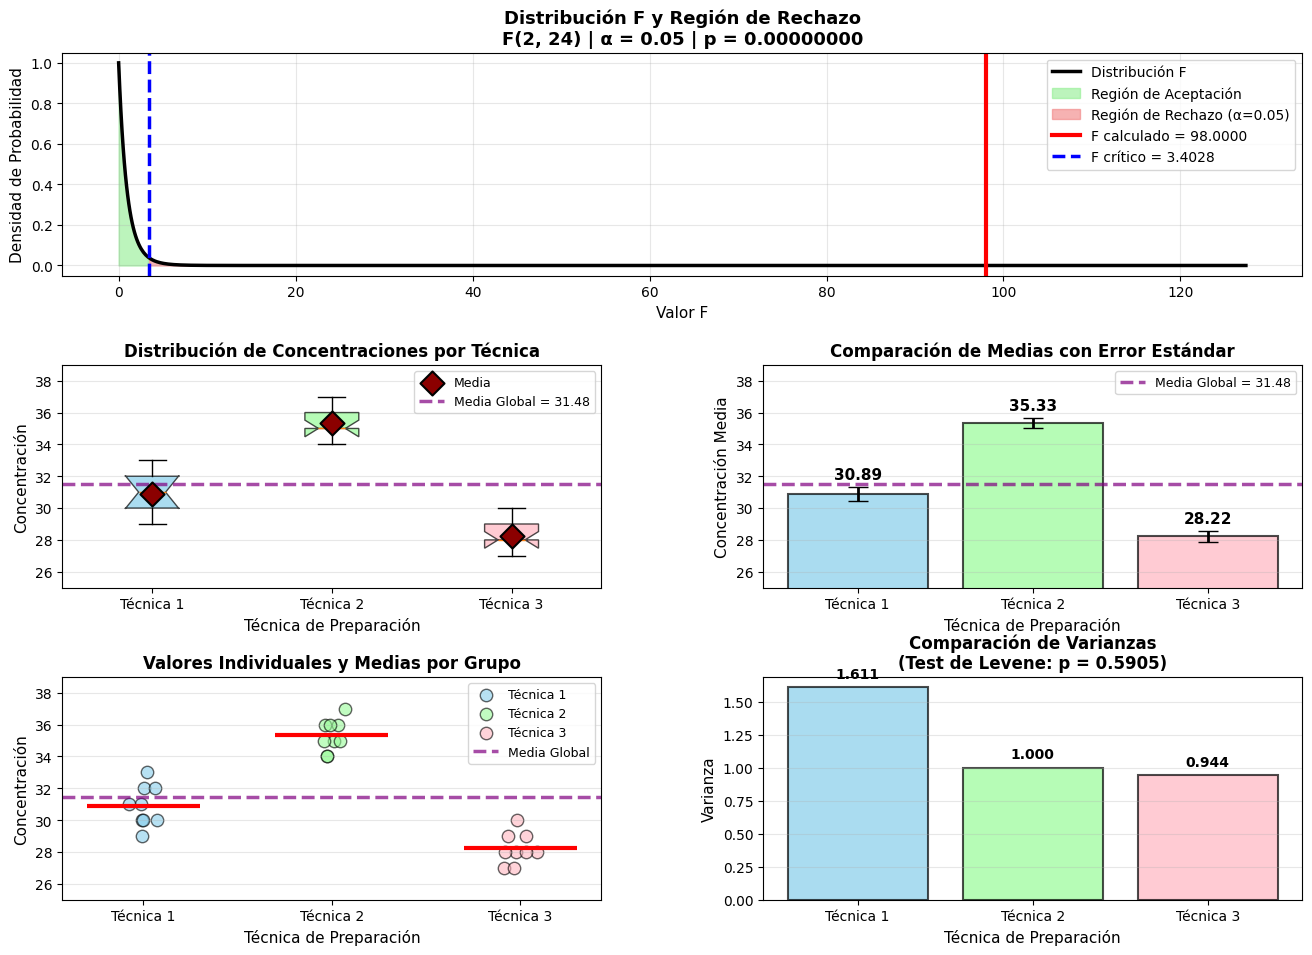


ANÁLISIS COMPLETO FINALIZADO


In [4]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# ============================================================================
# DATOS DEL PROBLEMA
# ============================================================================

# Concentración del compuesto por técnica de preparación
tecnica_1 = [30, 32, 31, 29, 30, 33, 32, 31, 30]
tecnica_2 = [35, 36, 34, 35, 37, 36, 34, 35, 36]
tecnica_3 = [28, 27, 29, 28, 30, 29, 28, 27, 28]

# Crear DataFrame
data = {
    'Técnica': ['Técnica 1'] * 9 + ['Técnica 2'] * 9 + ['Técnica 3'] * 9,
    'Concentración': tecnica_1 + tecnica_2 + tecnica_3
}

df = pd.DataFrame(data)
tecnicas = df['Técnica'].unique()

# ============================================================================
# CÁLCULOS PRELIMINARES
# ============================================================================

datos = [df[df['Técnica'] == t]['Concentración'].values for t in tecnicas]
n_grupos = len(tecnicas)
n_obs = [len(g) for g in datos]
n_total = sum(n_obs)

media_global = df['Concentración'].mean()
medias_tecnica = df.groupby('Técnica')['Concentración'].mean().values

print("DATOS ORIGINALES:")
print(df.to_string(index=False))
print("\n" + "="*80)
print("ESTADÍSTICAS DESCRIPTIVAS:")
print("="*80)
for i, tec in enumerate(tecnicas):
    print(f"{tec}:")
    print(f"  Media: {medias_tecnica[i]:.4f}")
    print(f"  Desviación estándar: {np.std(datos[i], ddof=1):.4f}")
    print(f"  Varianza: {np.var(datos[i], ddof=1):.4f}")
    print(f"  Mínimo: {np.min(datos[i]):.0f}")
    print(f"  Máximo: {np.max(datos[i]):.0f}")
    print(f"  Mediana: {np.median(datos[i]):.2f}")
    print(f"  Rango: {np.max(datos[i]) - np.min(datos[i]):.0f}")
    print(f"  n = {n_obs[i]}")
    print()
print(f"Media Global: {media_global:.4f}")
print(f"N total: {n_total}\n")

# ============================================================================
# ANOVA DE UNA VÍA MANUAL
# ============================================================================

# Suma de Cuadrados Total
SCT = np.sum((df['Concentración'] - media_global)**2)

# Suma de Cuadrados Entre Grupos (Between)
SCB = sum([n_obs[i]*(medias_tecnica[i] - media_global)**2 for i in range(n_grupos)])

# Suma de Cuadrados Error (Within)
SCE = SCT - SCB

# Grados de libertad
gl_b = n_grupos - 1  # Entre grupos
gl_e = n_total - n_grupos  # Error
gl_t = n_total - 1  # Total

# Cuadrados Medios
CMb = SCB / gl_b
CMe = SCE / gl_e

# Estadístico F
F = CMb / CMe
p_value = 1 - stats.f.cdf(F, gl_b, gl_e)
F_crit = stats.f.ppf(0.95, gl_b, gl_e)  # α = 0.05

# ============================================================================
# TABLA ANOVA
# ============================================================================

print("="*80)
print("TABLA ANOVA DE UNA VÍA")
print("="*80)
print(f"{'Fuente de Variación':<25} {'SC':>12} {'gl':>6} {'CM':>12} {'F':>12} {'Valor-p':>12}")
print("-"*80)
print(f"{'Entre Técnicas':<25} {SCB:>12.4f} {gl_b:>6} {CMb:>12.4f} {F:>12.4f} {p_value:>12.8f}")
print(f"{'Dentro (Error)':<25} {SCE:>12.4f} {gl_e:>6} {CMe:>12.4f}")
print(f"{'Total':<25} {SCT:>12.4f} {gl_t:>6}")
print("="*80)

# ============================================================================
# INTERPRETACIÓN
# ============================================================================

alpha = 0.05
print(f"\nINTERPRETACIÓN (α = {alpha}):")
print("-"*80)
print(f"Hipótesis Nula (H₀): μ₁ = μ₂ = μ₃")
print(f"  (Las concentraciones medias son iguales para las tres técnicas)")
print(f"Hipótesis Alternativa (H₁): Al menos una media difiere de las demás")
print()
print(f"F calculado = {F:.4f}")
print(f"F crítico (F_{{{gl_b},{gl_e}}}) = {F_crit:.4f}")
print(f"Valor-p = {p_value:.8f}")
print()

if p_value < alpha:
    print("DECISIÓN: RECHAZAR H₀")
    print("✓ Existen diferencias ALTAMENTE SIGNIFICATIVAS entre las concentraciones")
    print("  medias obtenidas con las diferentes técnicas de preparación (p < 0.05).")
    print()
    print("CONCLUSIÓN: Las técnicas de preparación SÍ afectan significativamente")
    print("            la concentración del compuesto en las soluciones.")
    print()
    print("COMPARACIÓN DE TÉCNICAS (ordenadas por concentración media):")
    ranking = sorted(zip(tecnicas, medias_tecnica), key=lambda x: x[1], reverse=True)
    for i, (tec, media) in enumerate(ranking, 1):
        print(f"  {i}. {tec}: {media:.4f} unidades")
    print()
    print(f"  → Técnica más eficiente: {ranking[0][0]} ({ranking[0][1]:.4f})")
    print(f"  → Técnica menos eficiente: {ranking[-1][0]} ({ranking[-1][1]:.4f})")
    print(f"  → Diferencia máxima: {ranking[0][1] - ranking[-1][1]:.4f} unidades")
else:
    print("DECISIÓN: NO RECHAZAR H₀")
    print("✗ No hay evidencia suficiente de diferencias significativas entre")
    print("  las concentraciones medias según la técnica utilizada (p ≥ 0.05).")
    print()
    print("CONCLUSIÓN: Las técnicas de preparación NO afectan significativamente")
    print("            la concentración del compuesto en las soluciones.")

print()

# ============================================================================
# VERIFICACIÓN CON SCIPY
# ============================================================================

F_scipy, p_scipy = stats.f_oneway(tecnica_1, tecnica_2, tecnica_3)
print("="*80)
print("VERIFICACIÓN CON scipy.stats.f_oneway:")
print(f"  F = {F_scipy:.4f}")
print(f"  p-value = {p_scipy:.8f}")
print(f"  Coincidencia: {'✓ Sí' if abs(F - F_scipy) < 0.0001 else '✗ No'}")
print("="*80)

# ============================================================================
# PRUEBA DE HOMOGENEIDAD DE VARIANZAS (LEVENE)
# ============================================================================

stat_levene, p_levene = stats.levene(tecnica_1, tecnica_2, tecnica_3)
print("\nPRUEBA DE LEVENE (Homogeneidad de varianzas):")
print(f"  Estadístico de Levene = {stat_levene:.4f}")
print(f"  p-value = {p_levene:.4f}")
if p_levene > 0.05:
    print(f"  ✓ Las varianzas son homogéneas (p > 0.05)")
    print(f"    Los supuestos de ANOVA se cumplen.")
else:
    print(f"  ✗ Las varianzas NO son homogéneas (p ≤ 0.05)")
    print(f"    Considerar pruebas alternativas (Welch ANOVA).")

# ============================================================================
# GRÁFICOS
# ============================================================================

fig = plt.figure(figsize=(16, 11))
gs = fig.add_gridspec(3, 2, hspace=0.4, wspace=0.3)

# Gráfico 1: Región de Rechazo
ax1 = fig.add_subplot(gs[0, :])
x = np.linspace(0, max(F, F_crit)*1.3, 1000)
y = stats.f.pdf(x, gl_b, gl_e)

ax1.plot(x, y, 'k-', linewidth=2.5, label='Distribución F')
ax1.fill_between(x[x <= F_crit], y[x <= F_crit], color='lightgreen',
                  alpha=0.6, label='Región de Aceptación')
ax1.fill_between(x[x >= F_crit], y[x >= F_crit], color='lightcoral',
                  alpha=0.6, label='Región de Rechazo (α=0.05)')
ax1.axvline(F, color='red', linewidth=3, linestyle='-',
            label=f'F calculado = {F:.4f}')
ax1.axvline(F_crit, color='blue', linestyle='--', linewidth=2.5,
            label=f'F crítico = {F_crit:.4f}')
ax1.set_title(f'Distribución F y Región de Rechazo\nF({gl_b}, {gl_e}) | α = 0.05 | p = {p_value:.8f}',
              fontsize=13, fontweight='bold')
ax1.set_xlabel('Valor F', fontsize=11)
ax1.set_ylabel('Densidad de Probabilidad', fontsize=11)
ax1.legend(fontsize=10, loc='upper right')
ax1.grid(alpha=0.3)

# Gráfico 2: Box Plot
ax2 = fig.add_subplot(gs[1, 0])
bp = ax2.boxplot(datos, labels=['Técnica 1', 'Técnica 2', 'Técnica 3'],
                  patch_artist=True, notch=True, showmeans=True,
                  meanprops=dict(marker='o', markerfacecolor='red', markersize=8))
colors = ['#87CEEB', '#98FB98', '#FFB6C1']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax2.scatter([1, 2, 3], medias_tecnica, color='darkred', s=150, zorder=5,
            label='Media', marker='D', edgecolors='black', linewidths=1.5)
ax2.axhline(media_global, color='purple', linestyle='--', linewidth=2.5,
            label=f'Media Global = {media_global:.2f}', alpha=0.7)
ax2.set_title('Distribución de Concentraciones por Técnica',
              fontsize=12, fontweight='bold')
ax2.set_xlabel('Técnica de Preparación', fontsize=11)
ax2.set_ylabel('Concentración', fontsize=11)
ax2.legend(fontsize=9)
ax2.grid(axis='y', alpha=0.3)
ax2.set_ylim([25, 39])

# Gráfico 3: Gráfico de Barras con Error Estándar
ax3 = fig.add_subplot(gs[1, 1])
x_pos = np.arange(len(tecnicas))
errores = [np.std(d, ddof=1)/np.sqrt(len(d)) for d in datos]
bars = ax3.bar(x_pos, medias_tecnica, color=colors, alpha=0.7,
               edgecolor='black', linewidth=1.5, yerr=errores,
               capsize=7, error_kw={'linewidth': 2, 'ecolor': 'black'})
ax3.axhline(media_global, color='purple', linestyle='--', linewidth=2.5,
            label=f'Media Global = {media_global:.2f}', alpha=0.7)

for i, (bar, media) in enumerate(zip(bars, medias_tecnica)):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + errores[i] + 0.3,
             f'{media:.2f}',
             ha='center', va='bottom', fontweight='bold', fontsize=11)

ax3.set_xlabel('Técnica de Preparación', fontsize=11)
ax3.set_ylabel('Concentración Media', fontsize=11)
ax3.set_title('Comparación de Medias con Error Estándar', fontsize=12, fontweight='bold')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(['Técnica 1', 'Técnica 2', 'Técnica 3'])
ax3.legend(fontsize=9)
ax3.grid(axis='y', alpha=0.3)
ax3.set_ylim([25, 39])

# Gráfico 4: Gráfico de Dispersión Individual
ax4 = fig.add_subplot(gs[2, 0])
for i, (datos_grupo, tec, color) in enumerate(zip(datos, tecnicas, colors)):
    x_jitter = np.random.normal(i+1, 0.04, size=len(datos_grupo))
    ax4.scatter(x_jitter, datos_grupo, alpha=0.6, s=80, color=color,
                edgecolors='black', linewidths=1, label=tec)
    ax4.hlines(medias_tecnica[i], i+0.7, i+1.3, colors='red',
               linewidth=3, label='_nolegend_')

ax4.axhline(media_global, color='purple', linestyle='--', linewidth=2.5,
            label='Media Global', alpha=0.7)
ax4.set_xticks([1, 2, 3])
ax4.set_xticklabels(['Técnica 1', 'Técnica 2', 'Técnica 3'])
ax4.set_xlabel('Técnica de Preparación', fontsize=11)
ax4.set_ylabel('Concentración', fontsize=11)
ax4.set_title('Valores Individuales y Medias por Grupo', fontsize=12, fontweight='bold')
ax4.legend(fontsize=9)
ax4.grid(axis='y', alpha=0.3)
ax4.set_ylim([25, 39])

# Gráfico 5: Gráfico de Varianza
ax5 = fig.add_subplot(gs[2, 1])
varianzas = [np.var(d, ddof=1) for d in datos]
bars_var = ax5.bar(x_pos, varianzas, color=colors, alpha=0.7,
                   edgecolor='black', linewidth=1.5)
for i, (bar, var) in enumerate(zip(bars_var, varianzas)):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{var:.3f}',
             ha='center', va='bottom', fontweight='bold', fontsize=10)

ax5.set_xlabel('Técnica de Preparación', fontsize=11)
ax5.set_ylabel('Varianza', fontsize=11)
ax5.set_title(f'Comparación de Varianzas\n(Test de Levene: p = {p_levene:.4f})',
              fontsize=12, fontweight='bold')
ax5.set_xticks(x_pos)
ax5.set_xticklabels(['Técnica 1', 'Técnica 2', 'Técnica 3'])
ax5.grid(axis='y', alpha=0.3)

plt.show()

print("\n" + "="*80)
print("ANÁLISIS COMPLETO FINALIZADO")
print("="*80)

DATOS ORIGINALES:
Tratamiento  Altura
          A      20
          A      22
          A      19
          A      21
          A      20
          A      23
          A      22
          A      21
          A      20
          A      22
          B      25
          B      24
          B      26
          B      27
          B      25
          B      26
          B      24
          B      27
          B      26
          B      25
          C      22
          C      23
          C      21
          C      22
          C      21
          C      23
          C      22
          C      21
          C      22
          C      23
          D      28
          D      29
          D      27
          D      30
          D      29
          D      28
          D      29
          D      30
          D      28
          D      29

ESTADÍSTICAS DESCRIPTIVAS:
Tratamiento A:
  Media: 21.0000 cm
  Desviación estándar: 1.2472 cm
  Varianza: 1.5556
  Mínimo: 19 cm
  Máximo: 23 cm
  Mediana: 21.0

/tmp/ipython-input-754411876.py:258: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax2.boxplot(datos, labels=['A', 'B', 'C', 'D'],


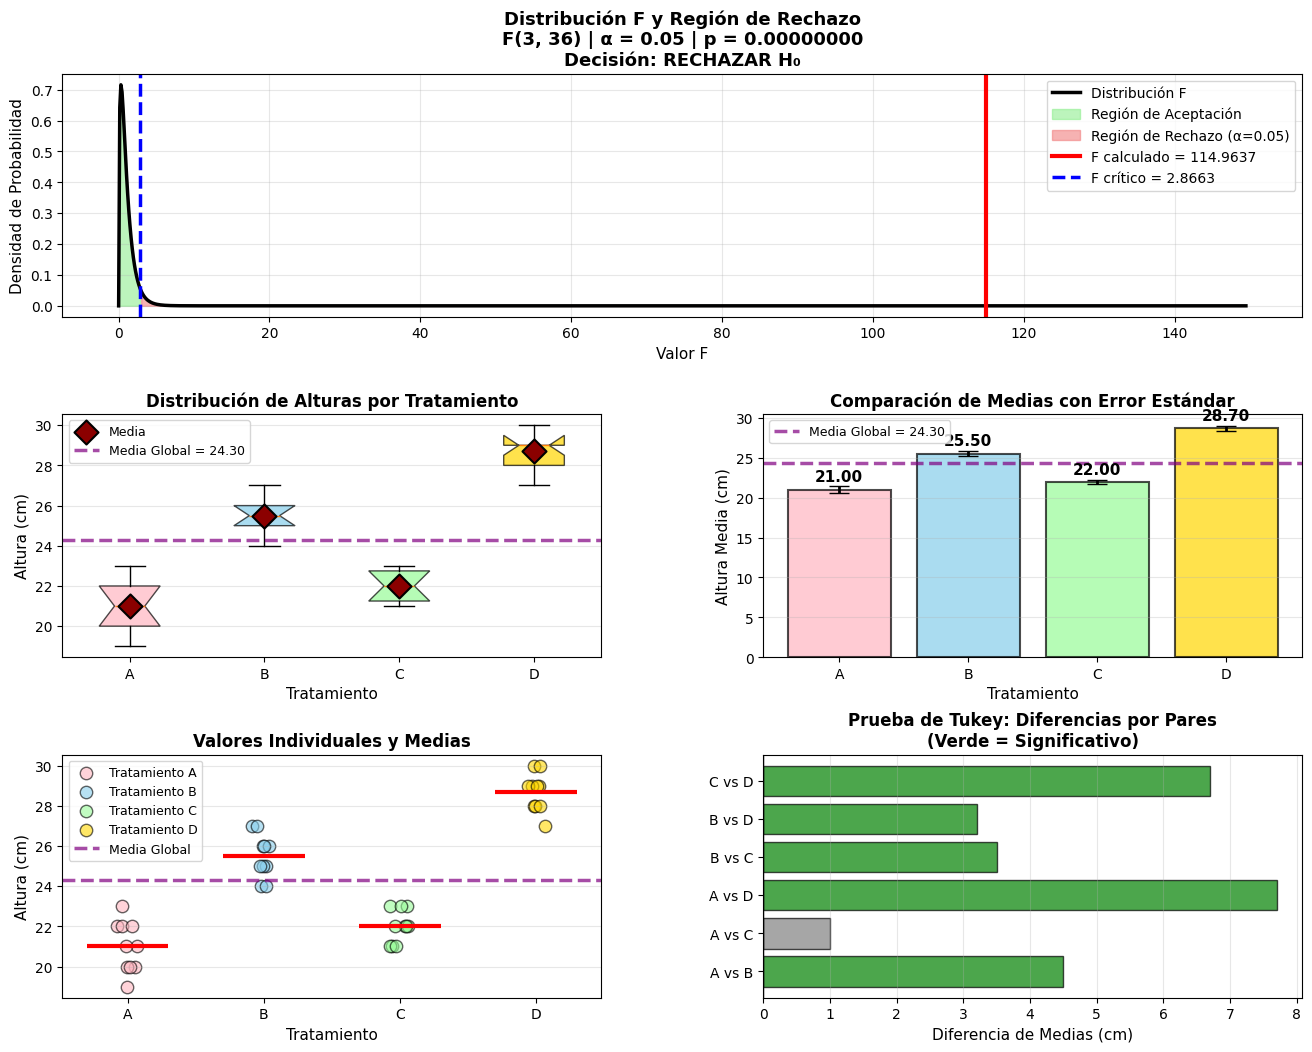


ANÁLISIS COMPLETO FINALIZADO


In [5]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from itertools import combinations

# ============================================================================
# DATOS DEL PROBLEMA
# ============================================================================

# Altura de plantas (en cm) por tratamiento de fertilizante
tratamiento_A = [20, 22, 19, 21, 20, 23, 22, 21, 20, 22]
tratamiento_B = [25, 24, 26, 27, 25, 26, 24, 27, 26, 25]
tratamiento_C = [22, 23, 21, 22, 21, 23, 22, 21, 22, 23]
tratamiento_D = [28, 29, 27, 30, 29, 28, 29, 30, 28, 29]

# Crear DataFrame
data = {
    'Tratamiento': ['A'] * 10 + ['B'] * 10 + ['C'] * 10 + ['D'] * 10,
    'Altura': tratamiento_A + tratamiento_B + tratamiento_C + tratamiento_D
}

df = pd.DataFrame(data)
tratamientos = df['Tratamiento'].unique()

# ============================================================================
# CÁLCULOS PRELIMINARES
# ============================================================================

datos = [df[df['Tratamiento'] == t]['Altura'].values for t in tratamientos]
n_grupos = len(tratamientos)
n_obs = [len(g) for g in datos]
n_total = sum(n_obs)

media_global = df['Altura'].mean()
medias_tratamiento = df.groupby('Tratamiento')['Altura'].mean().values

print("DATOS ORIGINALES:")
print(df.to_string(index=False))
print("\n" + "="*80)
print("ESTADÍSTICAS DESCRIPTIVAS:")
print("="*80)
for i, trat in enumerate(tratamientos):
    print(f"Tratamiento {trat}:")
    print(f"  Media: {medias_tratamiento[i]:.4f} cm")
    print(f"  Desviación estándar: {np.std(datos[i], ddof=1):.4f} cm")
    print(f"  Varianza: {np.var(datos[i], ddof=1):.4f}")
    print(f"  Mínimo: {np.min(datos[i]):.0f} cm")
    print(f"  Máximo: {np.max(datos[i]):.0f} cm")
    print(f"  Mediana: {np.median(datos[i]):.2f} cm")
    print(f"  n = {n_obs[i]}")
    print()
print(f"Media Global: {media_global:.4f} cm")
print(f"N total: {n_total}\n")

# ============================================================================
# ANOVA DE UNA VÍA MANUAL
# ============================================================================

# Suma de Cuadrados Total
SCT = np.sum((df['Altura'] - media_global)**2)

# Suma de Cuadrados Entre Grupos (Between)
SCB = sum([n_obs[i]*(medias_tratamiento[i] - media_global)**2 for i in range(n_grupos)])

# Suma de Cuadrados Error (Within)
SCE = SCT - SCB

# Grados de libertad
gl_b = n_grupos - 1  # Entre grupos
gl_e = n_total - n_grupos  # Error
gl_t = n_total - 1  # Total

# Cuadrados Medios
CMb = SCB / gl_b
CMe = SCE / gl_e

# Estadístico F
F = CMb / CMe
p_value = 1 - stats.f.cdf(F, gl_b, gl_e)
F_crit = stats.f.ppf(0.95, gl_b, gl_e)  # α = 0.05

# ============================================================================
# TABLA ANOVA
# ============================================================================

print("="*80)
print("TABLA ANOVA DE UNA VÍA")
print("="*80)
print(f"{'Fuente de Variación':<25} {'SC':>12} {'gl':>6} {'CM':>12} {'F':>12} {'Valor-p':>12}")
print("-"*80)
print(f"{'Entre Tratamientos':<25} {SCB:>12.4f} {gl_b:>6} {CMb:>12.4f} {F:>12.4f} {p_value:>12.8f}")
print(f"{'Dentro (Error)':<25} {SCE:>12.4f} {gl_e:>6} {CMe:>12.4f}")
print(f"{'Total':<25} {SCT:>12.4f} {gl_t:>6}")
print("="*80)

# ============================================================================
# INTERPRETACIÓN ANOVA
# ============================================================================

alpha = 0.05
print(f"\nPASO 1: PRUEBA ANOVA (α = {alpha}):")
print("-"*80)
print(f"Hipótesis Nula (H₀): μ_A = μ_B = μ_C = μ_D")
print(f"  (Las medias son iguales para todos los tratamientos)")
print(f"Hipótesis Alternativa (H₁): Al menos una media difiere")
print()
print(f"F calculado = {F:.4f}")
print(f"F crítico (F_{{{gl_b},{gl_e}}}) = {F_crit:.4f}")
print(f"Valor-p = {p_value:.8f}")
print()

rechazar_h0 = p_value < alpha

if rechazar_h0:
    print("DECISIÓN: RECHAZAR H₀")
    print("✓ Existen diferencias ALTAMENTE SIGNIFICATIVAS entre los tratamientos")
    print("  (p < 0.05).")
    print()
    print("CONCLUSIÓN: Los tratamientos de fertilizantes SÍ afectan significativamente")
    print("            el crecimiento de las plantas.")
else:
    print("DECISIÓN: NO RECHAZAR H₀")
    print("✗ No hay evidencia suficiente de diferencias significativas")
    print("  entre los tratamientos (p ≥ 0.05).")
    print()
    print("CONCLUSIÓN: Los tratamientos NO afectan significativamente el crecimiento.")
    print("\nNOTA: Como no se rechaza H₀, NO se aplica la prueba de Tukey.")

print()

# ============================================================================
# PRUEBA POST-HOC DE TUKEY (Solo si se rechaza H₀)
# ============================================================================

if rechazar_h0:
    print("="*80)
    print("PASO 2: PRUEBA POST-HOC DE TUKEY HSD")
    print("="*80)
    print("(Para identificar qué pares de tratamientos difieren significativamente)\n")

    # Calcular HSD de Tukey
    q_crit = 3.74  # Valor crítico de Tukey para k=4, gl_e=36, α=0.05
    # Alternativamente, usar tabla o aproximación

    # Calcular diferencias entre medias
    diferencias = []
    for i, j in combinations(range(n_grupos), 2):
        diff = abs(medias_tratamiento[i] - medias_tratamiento[j])
        se_diff = np.sqrt(CMe * (1/n_obs[i] + 1/n_obs[j]) / 2)
        hsd = q_crit * se_diff
        significativo = diff > hsd

        diferencias.append({
            'Par': f"{tratamientos[i]} vs {tratamientos[j]}",
            'Media_1': medias_tratamiento[i],
            'Media_2': medias_tratamiento[j],
            'Diferencia': diff,
            'HSD': hsd,
            'Significativo': significativo
        })

    df_tukey = pd.DataFrame(diferencias)

    print("Comparaciones por pares:")
    print("-"*80)
    print(f"{'Par':<15} {'Media 1':>10} {'Media 2':>10} {'Diferencia':>12} {'HSD':>10} {'Significativo':>15}")
    print("-"*80)

    for _, row in df_tukey.iterrows():
        sig_symbol = "✓ Sí" if row['Significativo'] else "✗ No"
        print(f"{row['Par']:<15} {row['Media_1']:>10.4f} {row['Media_2']:>10.4f} "
              f"{row['Diferencia']:>12.4f} {row['HSD']:>10.4f} {sig_symbol:>15}")

    print("-"*80)
    print("\nInterpretación de Tukey:")
    print("-"*80)

    # Identificar grupos homogéneos
    pares_sig = df_tukey[df_tukey['Significativo']]
    if len(pares_sig) > 0:
        print("Diferencias significativas encontradas entre:")
        for _, row in pares_sig.iterrows():
            print(f"  • {row['Par']}: diferencia = {row['Diferencia']:.4f} cm")
    else:
        print("No se encontraron diferencias significativas entre pares específicos.")

    print()
    print("RANKING DE TRATAMIENTOS (de mayor a menor altura):")
    ranking = sorted(zip(tratamientos, medias_tratamiento), key=lambda x: x[1], reverse=True)
    for i, (trat, media) in enumerate(ranking, 1):
        print(f"  {i}. Tratamiento {trat}: {media:.4f} cm")

    print()
    print("RECOMENDACIÓN:")
    print(f"  → Tratamiento más efectivo: {ranking[0][0]} ({ranking[0][1]:.4f} cm)")
    print(f"  → Tratamiento menos efectivo: {ranking[-1][0]} ({ranking[-1][1]:.4f} cm)")
    print(f"  → Diferencia máxima: {ranking[0][1] - ranking[-1][1]:.4f} cm")

# ============================================================================
# VERIFICACIÓN CON SCIPY
# ============================================================================

F_scipy, p_scipy = stats.f_oneway(tratamiento_A, tratamiento_B,
                                   tratamiento_C, tratamiento_D)
print("\n" + "="*80)
print("VERIFICACIÓN CON scipy.stats.f_oneway:")
print(f"  F = {F_scipy:.4f}")
print(f"  p-value = {p_scipy:.8f}")
print(f"  Coincidencia: {'✓ Sí' if abs(F - F_scipy) < 0.0001 else '✗ No'}")
print("="*80)

# ============================================================================
# PRUEBA DE HOMOGENEIDAD DE VARIANZAS
# ============================================================================

stat_levene, p_levene = stats.levene(tratamiento_A, tratamiento_B,
                                      tratamiento_C, tratamiento_D)
print("\nPRUEBA DE LEVENE (Homogeneidad de varianzas):")
print(f"  Estadístico = {stat_levene:.4f}")
print(f"  p-value = {p_levene:.4f}")
if p_levene > 0.05:
    print(f"  ✓ Las varianzas son homogéneas (supuesto de ANOVA cumplido)")
else:
    print(f"  ✗ Las varianzas NO son homogéneas")

# ============================================================================
# GRÁFICOS
# ============================================================================

fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 2, hspace=0.4, wspace=0.3)

# Gráfico 1: Región de Rechazo
ax1 = fig.add_subplot(gs[0, :])
x = np.linspace(0, max(F, F_crit)*1.3, 1000)
y = stats.f.pdf(x, gl_b, gl_e)

ax1.plot(x, y, 'k-', linewidth=2.5, label='Distribución F')
ax1.fill_between(x[x <= F_crit], y[x <= F_crit], color='lightgreen',
                  alpha=0.6, label='Región de Aceptación')
ax1.fill_between(x[x >= F_crit], y[x >= F_crit], color='lightcoral',
                  alpha=0.6, label='Región de Rechazo (α=0.05)')
ax1.axvline(F, color='red', linewidth=3, linestyle='-',
            label=f'F calculado = {F:.4f}')
ax1.axvline(F_crit, color='blue', linestyle='--', linewidth=2.5,
            label=f'F crítico = {F_crit:.4f}')
decision_text = "RECHAZAR H₀" if rechazar_h0 else "NO RECHAZAR H₀"
ax1.set_title(f'Distribución F y Región de Rechazo\nF({gl_b}, {gl_e}) | α = 0.05 | p = {p_value:.8f}\nDecisión: {decision_text}',
              fontsize=13, fontweight='bold')
ax1.set_xlabel('Valor F', fontsize=11)
ax1.set_ylabel('Densidad de Probabilidad', fontsize=11)
ax1.legend(fontsize=10, loc='upper right')
ax1.grid(alpha=0.3)

# Gráfico 2: Box Plot
ax2 = fig.add_subplot(gs[1, 0])
bp = ax2.boxplot(datos, labels=['A', 'B', 'C', 'D'],
                  patch_artist=True, notch=True, showmeans=True,
                  meanprops=dict(marker='o', markerfacecolor='red', markersize=8))
colors = ['#FFB6C1', '#87CEEB', '#98FB98', '#FFD700']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax2.scatter([1, 2, 3, 4], medias_tratamiento, color='darkred', s=150, zorder=5,
            label='Media', marker='D', edgecolors='black', linewidths=1.5)
ax2.axhline(media_global, color='purple', linestyle='--', linewidth=2.5,
            label=f'Media Global = {media_global:.2f}', alpha=0.7)
ax2.set_title('Distribución de Alturas por Tratamiento',
              fontsize=12, fontweight='bold')
ax2.set_xlabel('Tratamiento', fontsize=11)
ax2.set_ylabel('Altura (cm)', fontsize=11)
ax2.legend(fontsize=9)
ax2.grid(axis='y', alpha=0.3)

# Gráfico 3: Gráfico de Barras con Error
ax3 = fig.add_subplot(gs[1, 1])
x_pos = np.arange(len(tratamientos))
errores = [np.std(d, ddof=1)/np.sqrt(len(d)) for d in datos]
bars = ax3.bar(x_pos, medias_tratamiento, color=colors, alpha=0.7,
               edgecolor='black', linewidth=1.5, yerr=errores,
               capsize=7, error_kw={'linewidth': 2, 'ecolor': 'black'})
ax3.axhline(media_global, color='purple', linestyle='--', linewidth=2.5,
            label=f'Media Global = {media_global:.2f}', alpha=0.7)

for i, (bar, media) in enumerate(zip(bars, medias_tratamiento)):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + errores[i] + 0.3,
             f'{media:.2f}',
             ha='center', va='bottom', fontweight='bold', fontsize=11)

ax3.set_xlabel('Tratamiento', fontsize=11)
ax3.set_ylabel('Altura Media (cm)', fontsize=11)
ax3.set_title('Comparación de Medias con Error Estándar', fontsize=12, fontweight='bold')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(['A', 'B', 'C', 'D'])
ax3.legend(fontsize=9)
ax3.grid(axis='y', alpha=0.3)

# Gráfico 4: Valores Individuales
ax4 = fig.add_subplot(gs[2, 0])
for i, (datos_grupo, trat, color) in enumerate(zip(datos, tratamientos, colors)):
    x_jitter = np.random.normal(i+1, 0.04, size=len(datos_grupo))
    ax4.scatter(x_jitter, datos_grupo, alpha=0.6, s=80, color=color,
                edgecolors='black', linewidths=1, label=f'Tratamiento {trat}')
    ax4.hlines(medias_tratamiento[i], i+0.7, i+1.3, colors='red',
               linewidth=3, label='_nolegend_')

ax4.axhline(media_global, color='purple', linestyle='--', linewidth=2.5,
            label='Media Global', alpha=0.7)
ax4.set_xticks([1, 2, 3, 4])
ax4.set_xticklabels(['A', 'B', 'C', 'D'])
ax4.set_xlabel('Tratamiento', fontsize=11)
ax4.set_ylabel('Altura (cm)', fontsize=11)
ax4.set_title('Valores Individuales y Medias', fontsize=12, fontweight='bold')
ax4.legend(fontsize=9)
ax4.grid(axis='y', alpha=0.3)

# Gráfico 5: Comparaciones de Tukey (si aplica)
ax5 = fig.add_subplot(gs[2, 1])
if rechazar_h0:
    # Crear matriz de diferencias significativas
    n_comp = len(diferencias)
    y_pos = np.arange(n_comp)
    colors_sig = ['green' if d['Significativo'] else 'gray' for d in diferencias]
    pares = [d['Par'] for d in diferencias]
    diffs = [d['Diferencia'] for d in diferencias]

    bars = ax5.barh(y_pos, diffs, color=colors_sig, alpha=0.7, edgecolor='black')
    ax5.set_yticks(y_pos)
    ax5.set_yticklabels(pares)
    ax5.set_xlabel('Diferencia de Medias (cm)', fontsize=11)
    ax5.set_title('Prueba de Tukey: Diferencias por Pares\n(Verde = Significativo)',
                  fontsize=12, fontweight='bold')
    ax5.grid(axis='x', alpha=0.3)
    ax5.axvline(0, color='black', linewidth=1)
else:
    ax5.text(0.5, 0.5, 'Prueba de Tukey no aplicable\n(H₀ no fue rechazada)',
             ha='center', va='center', fontsize=14, transform=ax5.transAxes,
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    ax5.set_xticks([])
    ax5.set_yticks([])

plt.show()

print("\n" + "="*80)
print("ANÁLISIS COMPLETO FINALIZADO")
print("="*80)

DATOS DEL ESTUDIO - PRESIÓN ARTERIAL (mmHg)
Tratamiento    Género  Presión
          X Masculino      130
          X Masculino      128
          X Masculino      132
          X Masculino      131
          X Masculino      129
          X Masculino      130
          X  Femenino      132
          X  Femenino      133
          X  Femenino      129
          X  Femenino      130
          X  Femenino      128
          X  Femenino      131
          Y Masculino      135
          Y Masculino      137
          Y Masculino      136
          Y Masculino      134
          Y Masculino      138
          Y Masculino      137
          Y  Femenino      136
          Y  Femenino      139
          Y  Femenino      135
          Y  Femenino      137
          Y  Femenino      136
          Y  Femenino      135
          Z Masculino      125
          Z Masculino      127
          Z Masculino      124
          Z Masculino      126
          Z Masculino      125
          Z Masculino     

/tmp/ipython-input-163333402.py:242: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp1 = ax1.boxplot(datos_box, labels=['X', 'Y', 'Z'], patch_artist=True, notch=True)
/tmp/ipython-input-163333402.py:257: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp2 = ax2.boxplot(datos_gen, labels=generos, patch_artist=True, notch=True)


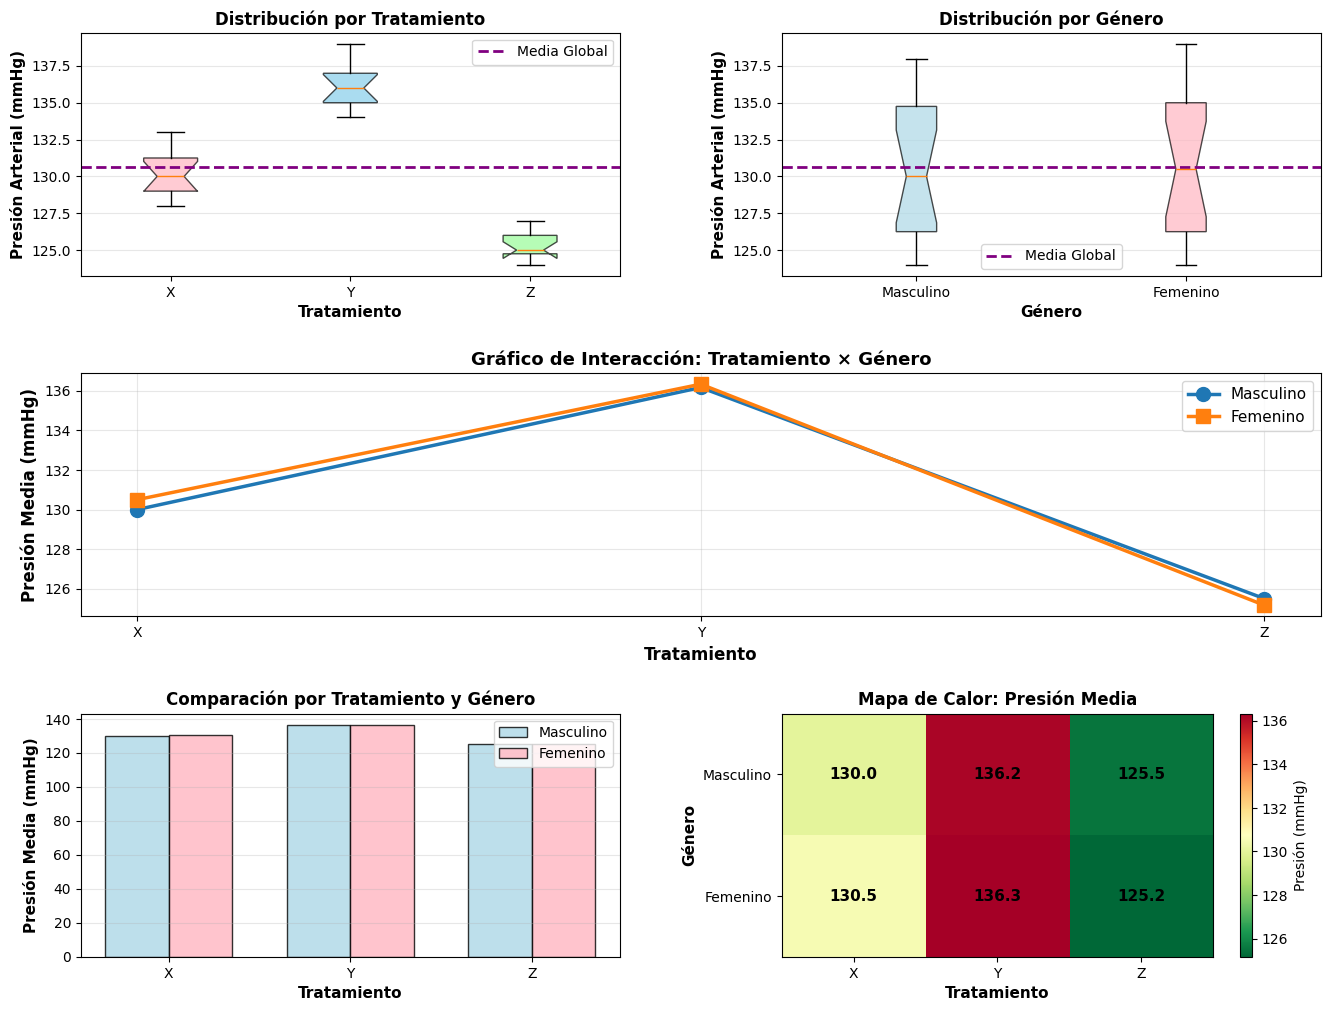


ANÁLISIS COMPLETO FINALIZADO


In [6]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from itertools import combinations

# ============================================================================
# DATOS DEL PROBLEMA - ANOVA DE DOS VÍAS
# ============================================================================

# Presión arterial (mmHg) por tratamiento
tratamiento_X = [130, 128, 132, 131, 129, 130, 132, 133, 129, 130, 128, 131]
tratamiento_Y = [135, 137, 136, 134, 138, 137, 136, 139, 135, 137, 136, 135]
tratamiento_Z = [125, 127, 124, 126, 125, 126, 124, 125, 127, 125, 126, 124]

# Identificar género (supuesto: primeros 6 = hombres, últimos 6 = mujeres)
# para demostrar ANOVA de dos vías
genero = ['Masculino'] * 6 + ['Femenino'] * 6

# Crear DataFrame
data = {
    'Tratamiento': ['X'] * 12 + ['Y'] * 12 + ['Z'] * 12,
    'Género': genero * 3,
    'Presión': tratamiento_X + tratamiento_Y + tratamiento_Z
}

df = pd.DataFrame(data)

print("="*80)
print("DATOS DEL ESTUDIO - PRESIÓN ARTERIAL (mmHg)")
print("="*80)
print(df.to_string(index=False))
print()

# ============================================================================
# ESTADÍSTICAS DESCRIPTIVAS
# ============================================================================

print("="*80)
print("ESTADÍSTICAS DESCRIPTIVAS POR TRATAMIENTO")
print("="*80)

tratamientos = df['Tratamiento'].unique()
for trat in tratamientos:
    datos_trat = df[df['Tratamiento'] == trat]['Presión']
    print(f"\nTratamiento {trat}:")
    print(f"  Media: {datos_trat.mean():.4f} mmHg")
    print(f"  Desviación estándar: {datos_trat.std(ddof=1):.4f} mmHg")
    print(f"  Mínimo: {datos_trat.min():.0f} mmHg")
    print(f"  Máximo: {datos_trat.max():.0f} mmHg")
    print(f"  n = {len(datos_trat)}")

print("\n" + "="*80)
print("ESTADÍSTICAS DESCRIPTIVAS POR GÉNERO")
print("="*80)

generos = df['Género'].unique()
for gen in generos:
    datos_gen = df[df['Género'] == gen]['Presión']
    print(f"\n{gen}:")
    print(f"  Media: {datos_gen.mean():.4f} mmHg")
    print(f"  Desviación estándar: {datos_gen.std(ddof=1):.4f} mmHg")
    print(f"  n = {len(datos_gen)}")

print(f"\nMedia Global: {df['Presión'].mean():.4f} mmHg")
print(f"N total: {len(df)}")

# ============================================================================
# ANOVA DE DOS VÍAS MANUAL
# ============================================================================

print("\n" + "="*80)
print("ANOVA DE DOS VÍAS: TRATAMIENTO Y GÉNERO")
print("="*80)

# Medias
media_global = df['Presión'].mean()
n_total = len(df)

# Factores
factor_a = 'Tratamiento'  # 3 niveles
factor_b = 'Género'        # 2 niveles

a = len(df[factor_a].unique())  # número de niveles del factor A
b = len(df[factor_b].unique())  # número de niveles del factor B
n_per_cell = len(df) // (a * b)  # observaciones por celda

# Calcular sumas de cuadrados
SST = np.sum((df['Presión'] - media_global)**2)

# SS Factor A (Tratamiento)
medias_A = df.groupby(factor_a)['Presión'].mean()
n_A = df.groupby(factor_a).size()
SSA = sum([n_A[trat] * (medias_A[trat] - media_global)**2 for trat in medias_A.index])

# SS Factor B (Género)
medias_B = df.groupby(factor_b)['Presión'].mean()
n_B = df.groupby(factor_b).size()
SSB = sum([n_B[gen] * (medias_B[gen] - media_global)**2 for gen in medias_B.index])

# SS Interacción (A x B)
medias_AB = df.groupby([factor_a, factor_b])['Presión'].mean()
SSAB = 0
for (trat, gen) in medias_AB.index:
    media_celda = medias_AB[(trat, gen)]
    media_trat = medias_A[trat]
    media_gen = medias_B[gen]
    n_celda = len(df[(df[factor_a] == trat) & (df[factor_b] == gen)])
    SSAB += n_celda * (media_celda - media_trat - media_gen + media_global)**2

# SS Error
SSE = SST - SSA - SSB - SSAB

# Grados de libertad
df_A = a - 1
df_B = b - 1
df_AB = (a - 1) * (b - 1)
df_E = n_total - (a * b)
df_T = n_total - 1

# Cuadrados medios
MSA = SSA / df_A
MSB = SSB / df_B
MSAB = SSAB / df_AB
MSE = SSE / df_E

# Estadísticos F
F_A = MSA / MSE
F_B = MSB / MSE
F_AB = MSAB / MSE

# Valores p
p_A = 1 - stats.f.cdf(F_A, df_A, df_E)
p_B = 1 - stats.f.cdf(F_B, df_B, df_E)
p_AB = 1 - stats.f.cdf(F_AB, df_AB, df_E)

# Valores críticos
F_crit_A = stats.f.ppf(0.95, df_A, df_E)
F_crit_B = stats.f.ppf(0.95, df_B, df_E)
F_crit_AB = stats.f.ppf(0.95, df_AB, df_E)

# ============================================================================
# TABLA ANOVA DE DOS VÍAS
# ============================================================================

print("\nTABLA ANOVA DE DOS VÍAS:")
print("-"*95)
print(f"{'Fuente':<20} {'SC':>12} {'gl':>6} {'CM':>12} {'F':>12} {'Valor-p':>12} {'F crítico':>12}")
print("-"*95)
print(f"{'Tratamiento (A)':<20} {SSA:>12.4f} {df_A:>6} {MSA:>12.4f} {F_A:>12.4f} {p_A:>12.6f} {F_crit_A:>12.4f}")
print(f"{'Género (B)':<20} {SSB:>12.4f} {df_B:>6} {MSB:>12.4f} {F_B:>12.4f} {p_B:>12.6f} {F_crit_B:>12.4f}")
print(f"{'Interacción (AxB)':<20} {SSAB:>12.4f} {df_AB:>6} {MSAB:>12.4f} {F_AB:>12.4f} {p_AB:>12.6f} {F_crit_AB:>12.4f}")
print(f"{'Error':<20} {SSE:>12.4f} {df_E:>6} {MSE:>12.4f}")
print(f"{'Total':<20} {SST:>12.4f} {df_T:>6}")
print("-"*95)

# ============================================================================
# INTERPRETACIÓN
# ============================================================================

alpha = 0.05
print(f"\nINTERPRETACIÓN DE RESULTADOS (α = {alpha}):")
print("="*80)

# Factor A: Tratamiento
print("\n1. EFECTO DEL TRATAMIENTO:")
print("-"*80)
print(f"   H₀: No hay diferencias entre tratamientos")
print(f"   F = {F_A:.4f}, p-value = {p_A:.6f}")
if p_A < alpha:
    print(f"   ✓ RECHAZAR H₀: Los tratamientos tienen efectos SIGNIFICATIVAMENTE")
    print(f"     diferentes sobre la presión arterial (p < {alpha})")
else:
    print(f"   ✗ NO RECHAZAR H₀: Los tratamientos NO difieren significativamente")
    print(f"     (p ≥ {alpha})")

# Factor B: Género
print("\n2. EFECTO DEL GÉNERO:")
print("-"*80)
print(f"   H₀: No hay diferencias entre géneros")
print(f"   F = {F_B:.4f}, p-value = {p_B:.6f}")
if p_B < alpha:
    print(f"   ✓ RECHAZAR H₀: El género tiene un efecto SIGNIFICATIVO")
    print(f"     sobre la presión arterial (p < {alpha})")
else:
    print(f"   ✗ NO RECHAZAR H₀: El género NO tiene efecto significativo")
    print(f"     (p ≥ {alpha})")

# Interacción
print("\n3. INTERACCIÓN TRATAMIENTO × GÉNERO:")
print("-"*80)
print(f"   H₀: No hay interacción entre tratamiento y género")
print(f"   F = {F_AB:.4f}, p-value = {p_AB:.6f}")
if p_AB < alpha:
    print(f"   ✓ RECHAZAR H₀: Existe INTERACCIÓN SIGNIFICATIVA")
    print(f"     El efecto del tratamiento depende del género (p < {alpha})")
else:
    print(f"   ✗ NO RECHAZAR H₀: NO hay interacción significativa")
    print(f"     El efecto del tratamiento es independiente del género (p ≥ {alpha})")

# ============================================================================
# COMPARACIÓN DE MEDIAS
# ============================================================================

print("\n" + "="*80)
print("COMPARACIÓN DE MEDIAS")
print("="*80)

print("\nPor Tratamiento:")
for trat in sorted(medias_A.index):
    print(f"  Tratamiento {trat}: {medias_A[trat]:.4f} mmHg")

print("\nPor Género:")
for gen in medias_B.index:
    print(f"  {gen}: {medias_B[gen]:.4f} mmHg")

print("\nPor Tratamiento y Género (Medias de cada celda):")
for (trat, gen) in sorted(medias_AB.index):
    print(f"  Tratamiento {trat} - {gen}: {medias_AB[(trat, gen)]:.4f} mmHg")

# Identificar mejor tratamiento
mejor_tratamiento = medias_A.idxmin()
peor_tratamiento = medias_A.idxmax()

print("\n" + "="*80)
print("CONCLUSIONES:")
print("="*80)
print(f"• Tratamiento con MENOR presión (mejor): {mejor_tratamiento} ({medias_A[mejor_tratamiento]:.2f} mmHg)")
print(f"• Tratamiento con MAYOR presión (peor): {peor_tratamiento} ({medias_A[peor_tratamiento]:.2f} mmHg)")
print(f"• Diferencia: {medias_A[peor_tratamiento] - medias_A[mejor_tratamiento]:.2f} mmHg")

# ============================================================================
# GRÁFICOS
# ============================================================================

fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 2, hspace=0.4, wspace=0.3)

# Gráfico 1: Box plot por tratamiento
ax1 = fig.add_subplot(gs[0, 0])
datos_box = [df[df['Tratamiento'] == t]['Presión'].values for t in ['X', 'Y', 'Z']]
bp1 = ax1.boxplot(datos_box, labels=['X', 'Y', 'Z'], patch_artist=True, notch=True)
colors = ['#FFB6C1', '#87CEEB', '#98FB98']
for patch, color in zip(bp1['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax1.axhline(media_global, color='purple', linestyle='--', linewidth=2, label='Media Global')
ax1.set_xlabel('Tratamiento', fontsize=11, fontweight='bold')
ax1.set_ylabel('Presión Arterial (mmHg)', fontsize=11, fontweight='bold')
ax1.set_title('Distribución por Tratamiento', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Gráfico 2: Box plot por género
ax2 = fig.add_subplot(gs[0, 1])
datos_gen = [df[df['Género'] == g]['Presión'].values for g in generos]
bp2 = ax2.boxplot(datos_gen, labels=generos, patch_artist=True, notch=True)
colors_gen = ['#ADD8E6', '#FFB6C1']
for patch, color in zip(bp2['boxes'], colors_gen):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax2.axhline(media_global, color='purple', linestyle='--', linewidth=2, label='Media Global')
ax2.set_xlabel('Género', fontsize=11, fontweight='bold')
ax2.set_ylabel('Presión Arterial (mmHg)', fontsize=11, fontweight='bold')
ax2.set_title('Distribución por Género', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Gráfico 3: Gráfico de interacción
ax3 = fig.add_subplot(gs[1, :])
for gen in generos:
    medias_gen_trat = []
    for trat in ['X', 'Y', 'Z']:
        media = df[(df['Tratamiento'] == trat) & (df['Género'] == gen)]['Presión'].mean()
        medias_gen_trat.append(media)

    marker = 'o' if gen == 'Masculino' else 's'
    color = '#1f77b4' if gen == 'Masculino' else '#ff7f0e'
    ax3.plot(['X', 'Y', 'Z'], medias_gen_trat, marker=marker, markersize=10,
             linewidth=2.5, label=gen, color=color)

ax3.set_xlabel('Tratamiento', fontsize=12, fontweight='bold')
ax3.set_ylabel('Presión Media (mmHg)', fontsize=12, fontweight='bold')
ax3.set_title('Gráfico de Interacción: Tratamiento × Género', fontsize=13, fontweight='bold')
ax3.legend(fontsize=11)
ax3.grid(True, alpha=0.3)

# Gráfico 4: Barras agrupadas
ax4 = fig.add_subplot(gs[2, 0])
x = np.arange(len(['X', 'Y', 'Z']))
width = 0.35
medias_masc = [df[(df['Tratamiento'] == t) & (df['Género'] == 'Masculino')]['Presión'].mean()
               for t in ['X', 'Y', 'Z']]
medias_fem = [df[(df['Tratamiento'] == t) & (df['Género'] == 'Femenino')]['Presión'].mean()
              for t in ['X', 'Y', 'Z']]

bars1 = ax4.bar(x - width/2, medias_masc, width, label='Masculino', color='#ADD8E6',
                edgecolor='black', alpha=0.8)
bars2 = ax4.bar(x + width/2, medias_fem, width, label='Femenino', color='#FFB6C1',
                edgecolor='black', alpha=0.8)

ax4.set_xlabel('Tratamiento', fontsize=11, fontweight='bold')
ax4.set_ylabel('Presión Media (mmHg)', fontsize=11, fontweight='bold')
ax4.set_title('Comparación por Tratamiento y Género', fontsize=12, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(['X', 'Y', 'Z'])
ax4.legend(fontsize=10)
ax4.grid(axis='y', alpha=0.3)

# Gráfico 5: Mapa de calor de medias
ax5 = fig.add_subplot(gs[2, 1])
matriz_medias = np.zeros((len(generos), len(['X', 'Y', 'Z'])))
for i, gen in enumerate(generos):
    for j, trat in enumerate(['X', 'Y', 'Z']):
        matriz_medias[i, j] = df[(df['Tratamiento'] == trat) & (df['Género'] == gen)]['Presión'].mean()

im = ax5.imshow(matriz_medias, cmap='RdYlGn_r', aspect='auto')
ax5.set_xticks(np.arange(3))
ax5.set_yticks(np.arange(2))
ax5.set_xticklabels(['X', 'Y', 'Z'])
ax5.set_yticklabels(generos)
ax5.set_xlabel('Tratamiento', fontsize=11, fontweight='bold')
ax5.set_ylabel('Género', fontsize=11, fontweight='bold')
ax5.set_title('Mapa de Calor: Presión Media', fontsize=12, fontweight='bold')

# Añadir valores en el mapa
for i in range(len(generos)):
    for j in range(3):
        text = ax5.text(j, i, f'{matriz_medias[i, j]:.1f}',
                       ha="center", va="center", color="black", fontsize=11, fontweight='bold')

plt.colorbar(im, ax=ax5, label='Presión (mmHg)')

plt.show()

print("\n" + "="*80)
print("ANÁLISIS COMPLETO FINALIZADO")
print("="*80)

DATOS DEL ESTUDIO - CALIFICACIONES POR MÉTODO DE ENSEÑANZA Y DOCENTE
Método   Docente  Calificación
     A Docente 1            70
     A Docente 2            72
     A Docente 3            68
     A Docente 4            71
     A Docente 5            70
     A Docente 1            69
     A Docente 2            73
     A Docente 3            72
     A Docente 4            70
     A Docente 5            71
     A Docente 1            69
     A Docente 2            70
     A Docente 3            72
     A Docente 4            71
     A Docente 5            70
     B Docente 1            75
     B Docente 2            76
     B Docente 3            74
     B Docente 4            75
     B Docente 5            77
     B Docente 1            76
     B Docente 2            75
     B Docente 3            74
     B Docente 4            78
     B Docente 5            76
     B Docente 1            75
     B Docente 2            77
     B Docente 3            76
     B Docente 4            75
 

/tmp/ipython-input-3574609470.py:287: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp1 = ax1.boxplot(datos_box_met, labels=sorted(metodos), patch_artist=True, notch=True)
/tmp/ipython-input-3574609470.py:302: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp2 = ax2.boxplot(datos_box_doc, labels=['D1', 'D2', 'D3', 'D4', 'D5'], patch_artist=True, notch=True)


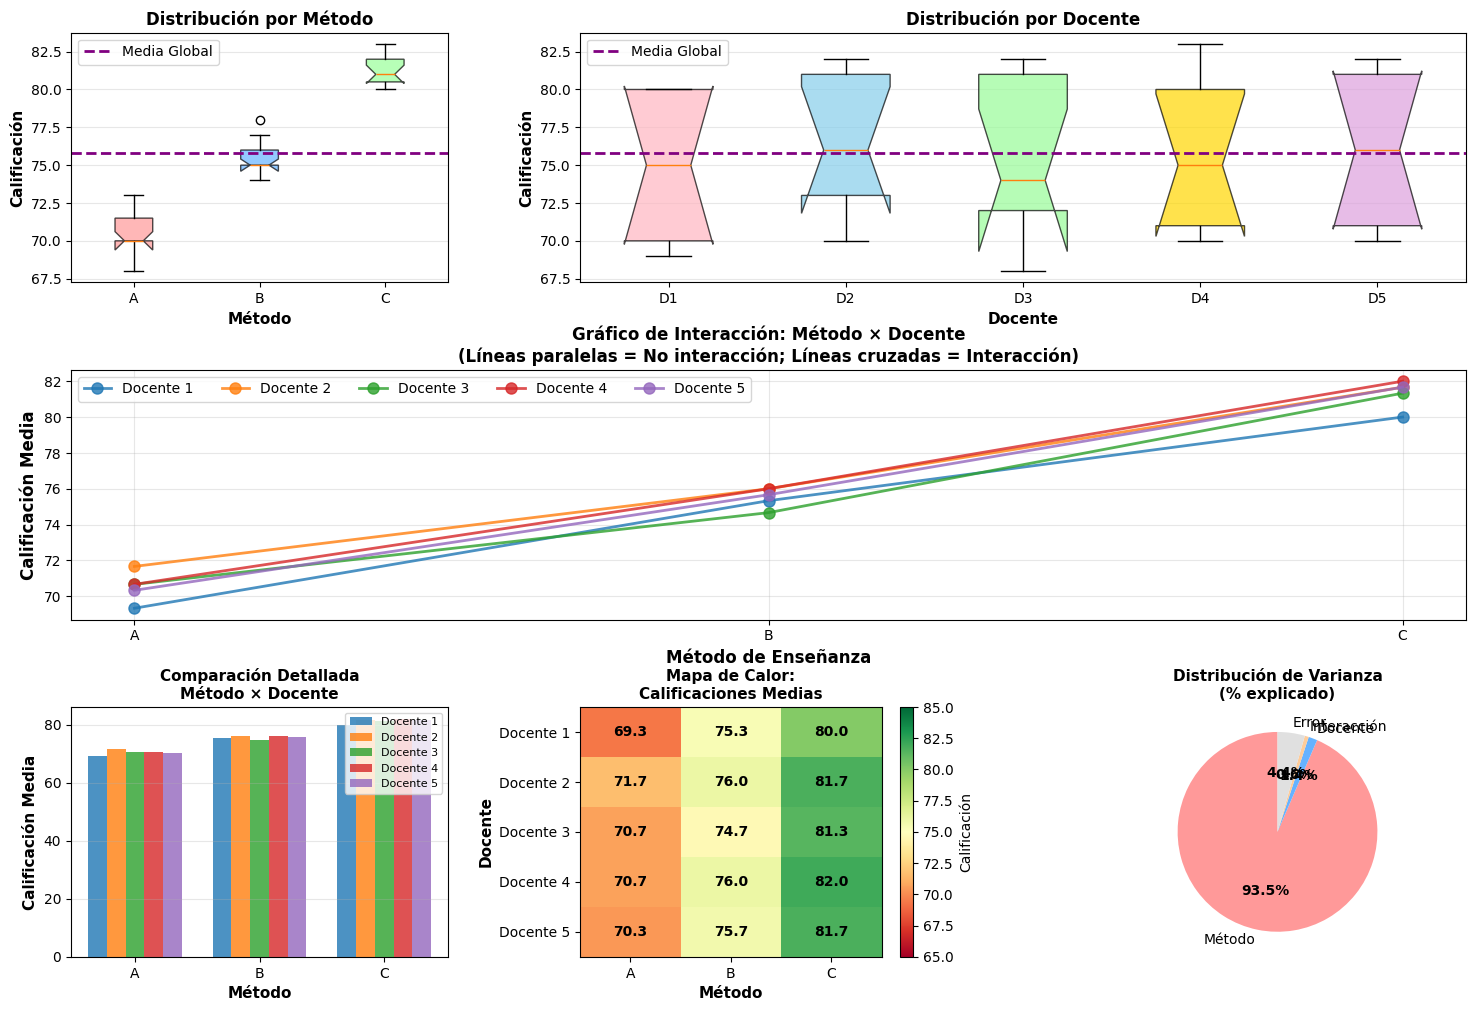


ANÁLISIS COMPLETO FINALIZADO


In [7]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from itertools import combinations

# ============================================================================
# DATOS DEL PROBLEMA - ANOVA DE DOS VÍAS CON INTERACCIÓN
# ============================================================================

# Calificaciones por método de enseñanza (puntaje sobre 100)
metodo_A = [70, 72, 68, 71, 70, 69, 73, 72, 70, 71, 69, 70, 72, 71, 70]
metodo_B = [75, 76, 74, 75, 77, 76, 75, 74, 78, 76, 75, 77, 76, 75, 74]
metodo_C = [80, 82, 81, 83, 82, 80, 81, 82, 83, 81, 80, 82, 81, 80, 82]

# Asignar docentes de manera equilibrada (5 docentes, 3 estudiantes por docente por método)
# Esto crea un diseño balanceado para ANOVA de dos vías
docentes = ['Docente 1', 'Docente 2', 'Docente 3', 'Docente 4', 'Docente 5'] * 3

# Crear DataFrame
data = {
    'Método': ['A'] * 15 + ['B'] * 15 + ['C'] * 15,
    'Docente': docentes * 3,
    'Calificación': metodo_A + metodo_B + metodo_C
}

df = pd.DataFrame(data)

print("="*90)
print("DATOS DEL ESTUDIO - CALIFICACIONES POR MÉTODO DE ENSEÑANZA Y DOCENTE")
print("="*90)
print(df.to_string(index=False))
print()

# ============================================================================
# ESTADÍSTICAS DESCRIPTIVAS
# ============================================================================

print("="*90)
print("ESTADÍSTICAS DESCRIPTIVAS POR MÉTODO")
print("="*90)

metodos = df['Método'].unique()
for met in sorted(metodos):
    datos_met = df[df['Método'] == met]['Calificación']
    print(f"\nMétodo {met}:")
    print(f"  Media: {datos_met.mean():.4f}")
    print(f"  Desviación estándar: {datos_met.std(ddof=1):.4f}")
    print(f"  Varianza: {datos_met.var(ddof=1):.4f}")
    print(f"  Mínimo: {datos_met.min():.0f}")
    print(f"  Máximo: {datos_met.max():.0f}")
    print(f"  n = {len(datos_met)}")

print("\n" + "="*90)
print("ESTADÍSTICAS DESCRIPTIVAS POR DOCENTE")
print("="*90)

docentes_unicos = sorted(df['Docente'].unique())
for doc in docentes_unicos:
    datos_doc = df[df['Docente'] == doc]['Calificación']
    print(f"\n{doc}:")
    print(f"  Media: {datos_doc.mean():.4f}")
    print(f"  Desviación estándar: {datos_doc.std(ddof=1):.4f}")
    print(f"  n = {len(datos_doc)}")

print(f"\n{'Media Global:':<20} {df['Calificación'].mean():.4f}")
print(f"{'N total:':<20} {len(df)}")

# ============================================================================
# ANOVA DE DOS VÍAS CON INTERACCIÓN - MANUAL
# ============================================================================

print("\n" + "="*90)
print("ANOVA DE DOS VÍAS: MÉTODO × DOCENTE (CON INTERACCIÓN)")
print("="*90)

# Parámetros básicos
media_global = df['Calificación'].mean()
n_total = len(df)

factor_a = 'Método'    # 3 niveles (A, B, C)
factor_b = 'Docente'   # 5 niveles

a = len(df[factor_a].unique())  # número de niveles del factor A
b = len(df[factor_b].unique())  # número de niveles del factor B
n_per_cell = len(df) // (a * b)  # observaciones por celda

# Calcular Suma de Cuadrados Total
SST = np.sum((df['Calificación'] - media_global)**2)

# SS Factor A (Método)
medias_A = df.groupby(factor_a)['Calificación'].mean()
n_A = df.groupby(factor_a).size()
SSA = sum([n_A[met] * (medias_A[met] - media_global)**2 for met in medias_A.index])

# SS Factor B (Docente)
medias_B = df.groupby(factor_b)['Calificación'].mean()
n_B = df.groupby(factor_b).size()
SSB = sum([n_B[doc] * (medias_B[doc] - media_global)**2 for doc in medias_B.index])

# SS Interacción (A × B)
medias_AB = df.groupby([factor_a, factor_b])['Calificación'].mean()
SSAB = 0
for (met, doc) in medias_AB.index:
    media_celda = medias_AB[(met, doc)]
    media_met = medias_A[met]
    media_doc = medias_B[doc]
    n_celda = len(df[(df[factor_a] == met) & (df[factor_b] == doc)])
    SSAB += n_celda * (media_celda - media_met - media_doc + media_global)**2

# SS Error (Residual)
SSE = SST - SSA - SSB - SSAB

# Grados de libertad
df_A = a - 1
df_B = b - 1
df_AB = (a - 1) * (b - 1)
df_E = n_total - (a * b)
df_T = n_total - 1

# Cuadrados medios
MSA = SSA / df_A
MSB = SSB / df_B
MSAB = SSAB / df_AB
MSE = SSE / df_E

# Estadísticos F
F_A = MSA / MSE
F_B = MSB / MSE
F_AB = MSAB / MSE

# Valores p
p_A = 1 - stats.f.cdf(F_A, df_A, df_E)
p_B = 1 - stats.f.cdf(F_B, df_B, df_E)
p_AB = 1 - stats.f.cdf(F_AB, df_AB, df_E)

# Valores críticos (α = 0.05)
F_crit_A = stats.f.ppf(0.95, df_A, df_E)
F_crit_B = stats.f.ppf(0.95, df_B, df_E)
F_crit_AB = stats.f.ppf(0.95, df_AB, df_E)

# ============================================================================
# TABLA ANOVA DE DOS VÍAS
# ============================================================================

print("\nTABLA ANOVA DE DOS VÍAS:")
print("-"*105)
print(f"{'Fuente de Variación':<25} {'SC':>12} {'gl':>6} {'CM':>12} {'F':>12} {'Valor-p':>12} {'F crítico':>12}")
print("-"*105)
print(f"{'Método (A)':<25} {SSA:>12.4f} {df_A:>6} {MSA:>12.4f} {F_A:>12.4f} {p_A:>12.8f} {F_crit_A:>12.4f}")
print(f"{'Docente (B)':<25} {SSB:>12.4f} {df_B:>6} {MSB:>12.4f} {F_B:>12.4f} {p_B:>12.8f} {F_crit_B:>12.4f}")
print(f"{'Interacción (A×B)':<25} {SSAB:>12.4f} {df_AB:>6} {MSAB:>12.4f} {F_AB:>12.4f} {p_AB:>12.8f} {F_crit_AB:>12.4f}")
print(f"{'Error (Residual)':<25} {SSE:>12.4f} {df_E:>6} {MSE:>12.4f}")
print(f"{'Total':<25} {SST:>12.4f} {df_T:>6}")
print("-"*105)

# Cálculo de R²
R2_total = 1 - (SSE / SST)
R2_A = SSA / SST
R2_B = SSB / SST
R2_AB = SSAB / SST

print(f"\nCOEFICIENTES DE DETERMINACIÓN:")
print(f"  R² Total (modelo completo): {R2_total:.4f} ({R2_total*100:.2f}% de varianza explicada)")
print(f"  R² Método: {R2_A:.4f} ({R2_A*100:.2f}%)")
print(f"  R² Docente: {R2_B:.4f} ({R2_B*100:.2f}%)")
print(f"  R² Interacción: {R2_AB:.4f} ({R2_AB*100:.2f}%)")

# ============================================================================
# INTERPRETACIÓN DETALLADA
# ============================================================================

alpha = 0.05
print(f"\n{'='*90}")
print(f"INTERPRETACIÓN DE RESULTADOS (α = {alpha})")
print(f"{'='*90}")

# Efecto principal A: Método
print(f"\n1. EFECTO PRINCIPAL DEL MÉTODO DE ENSEÑANZA:")
print("-"*90)
print(f"   H₀: μ_A = μ_B = μ_C (Los métodos tienen el mismo efecto)")
print(f"   H₁: Al menos un método difiere")
print(f"   F({df_A}, {df_E}) = {F_A:.4f}, p-value = {p_A:.8f}")
if p_A < alpha:
    print(f"   ✓ RECHAZAR H₀: Los métodos tienen efectos SIGNIFICATIVAMENTE diferentes")
    print(f"     sobre las calificaciones (p < {alpha})")
    print(f"\n   Ranking de métodos (de mayor a menor calificación):")
    ranking_metodos = sorted(medias_A.items(), key=lambda x: x[1], reverse=True)
    for i, (met, media) in enumerate(ranking_metodos, 1):
        print(f"     {i}. Método {met}: {media:.2f} puntos")
else:
    print(f"   ✗ NO RECHAZAR H₀: Los métodos NO difieren significativamente (p ≥ {alpha})")

# Efecto principal B: Docente
print(f"\n2. EFECTO PRINCIPAL DEL DOCENTE:")
print("-"*90)
print(f"   H₀: No hay diferencias entre docentes")
print(f"   H₁: Al menos un docente difiere")
print(f"   F({df_B}, {df_E}) = {F_B:.4f}, p-value = {p_B:.8f}")
if p_B < alpha:
    print(f"   ✓ RECHAZAR H₀: Los docentes tienen efectos SIGNIFICATIVAMENTE diferentes")
    print(f"     sobre las calificaciones (p < {alpha})")
    print(f"\n   Ranking de docentes:")
    ranking_docentes = sorted(medias_B.items(), key=lambda x: x[1], reverse=True)
    for i, (doc, media) in enumerate(ranking_docentes, 1):
        print(f"     {i}. {doc}: {media:.2f} puntos")
else:
    print(f"   ✗ NO RECHAZAR H₀: Los docentes NO tienen efecto significativo (p ≥ {alpha})")

# Interacción
print(f"\n3. EFECTO DE INTERACCIÓN (MÉTODO × DOCENTE):")
print("-"*90)
print(f"   H₀: No hay interacción entre método y docente")
print(f"   H₁: Existe interacción (el efecto del método depende del docente)")
print(f"   F({df_AB}, {df_E}) = {F_AB:.4f}, p-value = {p_AB:.8f}")
if p_AB < alpha:
    print(f"   ✓ RECHAZAR H₀: Existe INTERACCIÓN SIGNIFICATIVA (p < {alpha})")
    print(f"     → El efecto del método de enseñanza DEPENDE del docente que lo imparte")
    print(f"     → La efectividad de cada método varía según quién lo enseña")
else:
    print(f"   ✗ NO RECHAZAR H₀: NO hay interacción significativa (p ≥ {alpha})")
    print(f"     → El efecto del método es INDEPENDIENTE del docente")
    print(f"     → Todos los docentes obtienen resultados similares con cada método")

# ============================================================================
# ANÁLISIS DE MEDIAS POR COMBINACIÓN
# ============================================================================

print(f"\n{'='*90}")
print("MEDIAS POR COMBINACIÓN MÉTODO-DOCENTE")
print("="*90)

# Crear tabla de medias
tabla_medias = df.pivot_table(values='Calificación',
                               index='Docente',
                               columns='Método',
                               aggfunc='mean')
print("\n" + tabla_medias.to_string())

# Mejor y peor combinación
mejor_comb = medias_AB.idxmax()
peor_comb = medias_AB.idxmin()

print(f"\n{'='*90}")
print("CONCLUSIONES FINALES")
print("="*90)
print(f"\n• MEJOR COMBINACIÓN: Método {mejor_comb[0]} con {mejor_comb[1]}")
print(f"  Calificación media: {medias_AB[mejor_comb]:.2f} puntos")
print(f"\n• PEOR COMBINACIÓN: Método {peor_comb[0]} con {peor_comb[1]}")
print(f"  Calificación media: {medias_AB[peor_comb]:.2f} puntos")
print(f"\n• DIFERENCIA: {medias_AB[mejor_comb] - medias_AB[peor_comb]:.2f} puntos")

if p_A < alpha:
    mejor_metodo = ranking_metodos[0][0]
    print(f"\n• RECOMENDACIÓN GENERAL: Usar el Método {mejor_metodo} ({ranking_metodos[0][1]:.2f} puntos)")

# ============================================================================
# PRUEBA DE HOMOGENEIDAD DE VARIANZAS
# ============================================================================

print(f"\n{'='*90}")
print("VERIFICACIÓN DE SUPUESTOS")
print("="*90)

# Test de Levene
grupos_metodos = [df[df['Método'] == m]['Calificación'].values for m in sorted(metodos)]
stat_levene, p_levene = stats.levene(*grupos_metodos)

print(f"\nPrueba de Levene (Homogeneidad de varianzas):")
print(f"  Estadístico = {stat_levene:.4f}")
print(f"  p-value = {p_levene:.4f}")
if p_levene > 0.05:
    print(f"  ✓ Las varianzas son homogéneas (supuesto cumplido)")
else:
    print(f"  ⚠ Las varianzas NO son homogéneas (considerar transformación de datos)")

# ============================================================================
# GRÁFICOS
# ============================================================================

fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.35, wspace=0.35)

# Gráfico 1: Box plot por método
ax1 = fig.add_subplot(gs[0, 0])
datos_box_met = [df[df['Método'] == m]['Calificación'].values for m in sorted(metodos)]
bp1 = ax1.boxplot(datos_box_met, labels=sorted(metodos), patch_artist=True, notch=True)
colors_met = ['#FF9999', '#66B2FF', '#99FF99']
for patch, color in zip(bp1['boxes'], colors_met):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax1.axhline(media_global, color='purple', linestyle='--', linewidth=2, label='Media Global')
ax1.set_xlabel('Método', fontsize=11, fontweight='bold')
ax1.set_ylabel('Calificación', fontsize=11, fontweight='bold')
ax1.set_title('Distribución por Método', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Gráfico 2: Box plot por docente
ax2 = fig.add_subplot(gs[0, 1:])
datos_box_doc = [df[df['Docente'] == d]['Calificación'].values for d in docentes_unicos]
bp2 = ax2.boxplot(datos_box_doc, labels=['D1', 'D2', 'D3', 'D4', 'D5'], patch_artist=True, notch=True)
colors_doc = ['#FFB6C1', '#87CEEB', '#98FB98', '#FFD700', '#DDA0DD']
for patch, color in zip(bp2['boxes'], colors_doc):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax2.axhline(media_global, color='purple', linestyle='--', linewidth=2, label='Media Global')
ax2.set_xlabel('Docente', fontsize=11, fontweight='bold')
ax2.set_ylabel('Calificación', fontsize=11, fontweight='bold')
ax2.set_title('Distribución por Docente', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Gráfico 3: Gráfico de interacción (clave para interpretar)
ax3 = fig.add_subplot(gs[1, :])
for doc in docentes_unicos:
    medias_doc_met = []
    for met in sorted(metodos):
        media = df[(df['Método'] == met) & (df['Docente'] == doc)]['Calificación'].mean()
        medias_doc_met.append(media)

    ax3.plot(sorted(metodos), medias_doc_met, marker='o', markersize=8,
             linewidth=2, label=doc, alpha=0.8)

ax3.set_xlabel('Método de Enseñanza', fontsize=12, fontweight='bold')
ax3.set_ylabel('Calificación Media', fontsize=12, fontweight='bold')
ax3.set_title('Gráfico de Interacción: Método × Docente\n(Líneas paralelas = No interacción; Líneas cruzadas = Interacción)',
              fontsize=12, fontweight='bold')
ax3.legend(fontsize=10, ncol=5, loc='upper left')
ax3.grid(True, alpha=0.3)

# Gráfico 4: Barras agrupadas
ax4 = fig.add_subplot(gs[2, 0])
x = np.arange(len(sorted(metodos)))
width = 0.15
for i, doc in enumerate(docentes_unicos):
    medias = [df[(df['Método'] == met) & (df['Docente'] == doc)]['Calificación'].mean()
              for met in sorted(metodos)]
    offset = (i - 2) * width
    ax4.bar(x + offset, medias, width, label=doc, alpha=0.8)

ax4.set_xlabel('Método', fontsize=11, fontweight='bold')
ax4.set_ylabel('Calificación Media', fontsize=11, fontweight='bold')
ax4.set_title('Comparación Detallada\nMétodo × Docente', fontsize=11, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(sorted(metodos))
ax4.legend(fontsize=8)
ax4.grid(axis='y', alpha=0.3)

# Gráfico 5: Mapa de calor
ax5 = fig.add_subplot(gs[2, 1])
matriz_medias = tabla_medias.values
im = ax5.imshow(matriz_medias, cmap='RdYlGn', aspect='auto', vmin=65, vmax=85)
ax5.set_xticks(np.arange(len(sorted(metodos))))
ax5.set_yticks(np.arange(len(docentes_unicos)))
ax5.set_xticklabels(sorted(metodos))
ax5.set_yticklabels(docentes_unicos)
ax5.set_xlabel('Método', fontsize=11, fontweight='bold')
ax5.set_ylabel('Docente', fontsize=11, fontweight='bold')
ax5.set_title('Mapa de Calor:\nCalificaciones Medias', fontsize=11, fontweight='bold')

for i in range(len(docentes_unicos)):
    for j in range(len(sorted(metodos))):
        text = ax5.text(j, i, f'{matriz_medias[i, j]:.1f}',
                       ha="center", va="center", color="black", fontsize=10, fontweight='bold')

plt.colorbar(im, ax=ax5, label='Calificación')

# Gráfico 6: Efectos principales
ax6 = fig.add_subplot(gs[2, 2])
efectos = [SSA/SST*100, SSB/SST*100, SSAB/SST*100, SSE/SST*100]
labels = ['Método', 'Docente', 'Interacción', 'Error']
colors_pie = ['#FF9999', '#66B2FF', '#FFCC99', '#E0E0E0']
wedges, texts, autotexts = ax6.pie(efectos, labels=labels, autopct='%1.1f%%',
                                     colors=colors_pie, startangle=90)
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')
ax6.set_title('Distribución de Varianza\n(% explicado)', fontsize=11, fontweight='bold')

plt.show()

print("\n" + "="*90)
print("ANÁLISIS COMPLETO FINALIZADO")
print("="*90)

DATOS DEL ESTUDIO - RESISTENCIA DEL MATERIAL (MPa)
  Condición   Operador  Resistencia
Condición 1 Operador A          300
Condición 1 Operador A          305
Condición 1 Operador A          298
Condición 1 Operador A          302
Condición 1 Operador A          304
Condición 1 Operador B          300
Condición 1 Operador B          303
Condición 1 Operador B          301
Condición 1 Operador B          299
Condición 1 Operador B          302
Condición 2 Operador A          310
Condición 2 Operador A          312
Condición 2 Operador A          311
Condición 2 Operador A          313
Condición 2 Operador A          310
Condición 2 Operador B          312
Condición 2 Operador B          311
Condición 2 Operador B          314
Condición 2 Operador B          312
Condición 2 Operador B          310
Condición 3 Operador A          295
Condición 3 Operador A          297
Condición 3 Operador A          296
Condición 3 Operador A          295
Condición 3 Operador A          298
Condición 3 O

/tmp/ipython-input-4005733926.py:366: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp1 = ax1.boxplot(datos_box_cond, labels=['Cond 1', 'Cond 2', 'Cond 3', 'Cond 4'],
/tmp/ipython-input-4005733926.py:382: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp2 = ax2.boxplot(datos_box_op, labels=['Operador A', 'Operador B'],


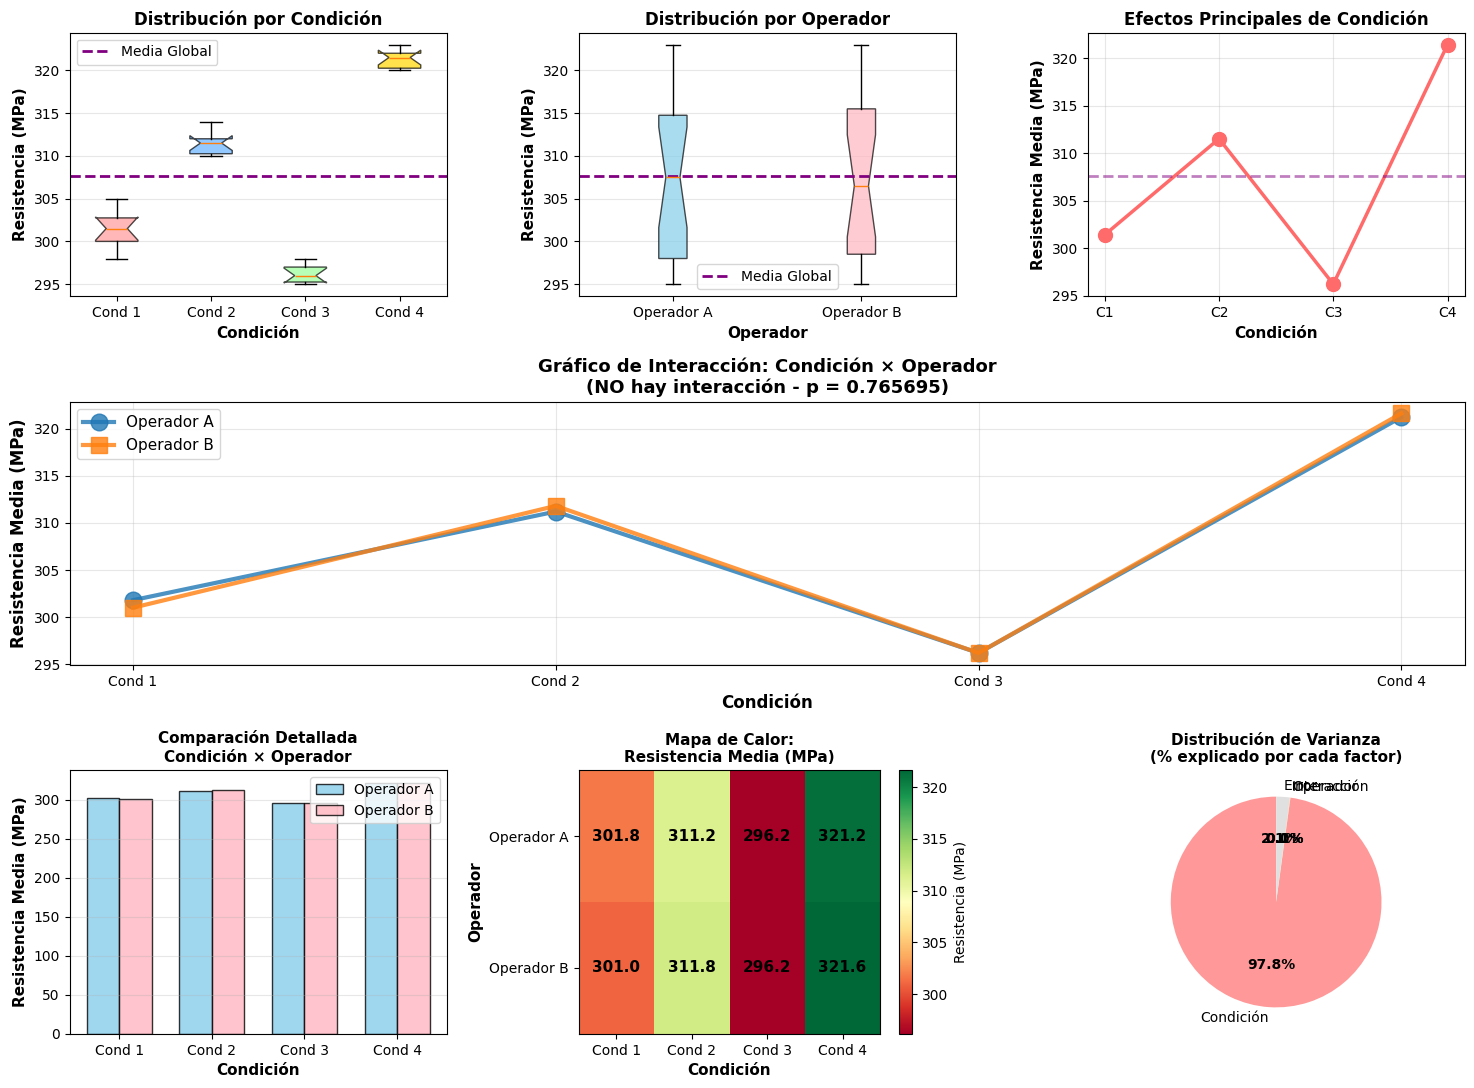


ANÁLISIS COMPLETO FINALIZADO


In [8]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from itertools import combinations

# ============================================================================
# DATOS DEL PROBLEMA - ANOVA DE DOS VÍAS CON INTERACCIÓN
# ============================================================================

# Resistencia del material (MPa) por condición
condicion_1 = [300, 305, 298, 302, 304, 300, 303, 301, 299, 302]
condicion_2 = [310, 312, 311, 313, 310, 312, 311, 314, 312, 310]
condicion_3 = [295, 297, 296, 295, 298, 297, 296, 295, 297, 296]
condicion_4 = [320, 322, 321, 323, 320, 322, 321, 323, 322, 320]

# Asignar operadores de manera equilibrada (2 operadores, 5 mediciones por operador por condición)
operadores = ['Operador A', 'Operador A', 'Operador A', 'Operador A', 'Operador A',
              'Operador B', 'Operador B', 'Operador B', 'Operador B', 'Operador B']

# Crear DataFrame
data = {
    'Condición': ['Condición 1'] * 10 + ['Condición 2'] * 10 + ['Condición 3'] * 10 + ['Condición 4'] * 10,
    'Operador': operadores * 4,
    'Resistencia': condicion_1 + condicion_2 + condicion_3 + condicion_4
}

df = pd.DataFrame(data)

print("="*95)
print("DATOS DEL ESTUDIO - RESISTENCIA DEL MATERIAL (MPa)")
print("="*95)
print(df.to_string(index=False))
print()

# ============================================================================
# ESTADÍSTICAS DESCRIPTIVAS
# ============================================================================

print("="*95)
print("ESTADÍSTICAS DESCRIPTIVAS POR CONDICIÓN")
print("="*95)

condiciones = df['Condición'].unique()
for cond in sorted(condiciones):
    datos_cond = df[df['Condición'] == cond]['Resistencia']
    print(f"\n{cond}:")
    print(f"  Media: {datos_cond.mean():.4f} MPa")
    print(f"  Desviación estándar: {datos_cond.std(ddof=1):.4f} MPa")
    print(f"  Varianza: {datos_cond.var(ddof=1):.4f}")
    print(f"  Mínimo: {datos_cond.min():.0f} MPa")
    print(f"  Máximo: {datos_cond.max():.0f} MPa")
    print(f"  Mediana: {datos_cond.median():.2f} MPa")
    print(f"  n = {len(datos_cond)}")

print("\n" + "="*95)
print("ESTADÍSTICAS DESCRIPTIVAS POR OPERADOR")
print("="*95)

operadores_unicos = sorted(df['Operador'].unique())
for op in operadores_unicos:
    datos_op = df[df['Operador'] == op]['Resistencia']
    print(f"\n{op}:")
    print(f"  Media: {datos_op.mean():.4f} MPa")
    print(f"  Desviación estándar: {datos_op.std(ddof=1):.4f} MPa")
    print(f"  n = {len(datos_op)}")

print(f"\n{'Media Global:':<20} {df['Resistencia'].mean():.4f} MPa")
print(f"{'N total:':<20} {len(df)}")

# ============================================================================
# ANOVA DE DOS VÍAS CON INTERACCIÓN - MANUAL
# ============================================================================

print("\n" + "="*95)
print("ANOVA DE DOS VÍAS: CONDICIÓN × OPERADOR (CON INTERACCIÓN)")
print("="*95)

# Parámetros básicos
media_global = df['Resistencia'].mean()
n_total = len(df)

factor_a = 'Condición'  # 4 niveles
factor_b = 'Operador'   # 2 niveles

a = len(df[factor_a].unique())
b = len(df[factor_b].unique())
n_per_cell = len(df) // (a * b)

# Calcular Suma de Cuadrados Total
SST = np.sum((df['Resistencia'] - media_global)**2)

# SS Factor A (Condición)
medias_A = df.groupby(factor_a)['Resistencia'].mean()
n_A = df.groupby(factor_a).size()
SSA = sum([n_A[cond] * (medias_A[cond] - media_global)**2 for cond in medias_A.index])

# SS Factor B (Operador)
medias_B = df.groupby(factor_b)['Resistencia'].mean()
n_B = df.groupby(factor_b).size()
SSB = sum([n_B[op] * (medias_B[op] - media_global)**2 for op in medias_B.index])

# SS Interacción (A × B)
medias_AB = df.groupby([factor_a, factor_b])['Resistencia'].mean()
SSAB = 0
for (cond, op) in medias_AB.index:
    media_celda = medias_AB[(cond, op)]
    media_cond = medias_A[cond]
    media_op = medias_B[op]
    n_celda = len(df[(df[factor_a] == cond) & (df[factor_b] == op)])
    SSAB += n_celda * (media_celda - media_cond - media_op + media_global)**2

# SS Error (Residual)
SSE = SST - SSA - SSB - SSAB

# Grados de libertad
df_A = a - 1
df_B = b - 1
df_AB = (a - 1) * (b - 1)
df_E = n_total - (a * b)
df_T = n_total - 1

# Cuadrados medios
MSA = SSA / df_A
MSB = SSB / df_B
MSAB = SSAB / df_AB
MSE = SSE / df_E

# Estadísticos F
F_A = MSA / MSE
F_B = MSB / MSE
F_AB = MSAB / MSE

# Valores p
p_A = 1 - stats.f.cdf(F_A, df_A, df_E)
p_B = 1 - stats.f.cdf(F_B, df_B, df_E)
p_AB = 1 - stats.f.cdf(F_AB, df_AB, df_E)

# Valores críticos (α = 0.05)
F_crit_A = stats.f.ppf(0.95, df_A, df_E)
F_crit_B = stats.f.ppf(0.95, df_B, df_E)
F_crit_AB = stats.f.ppf(0.95, df_AB, df_E)

# ============================================================================
# TABLA ANOVA DE DOS VÍAS
# ============================================================================

print("\nTABLA ANOVA DE DOS VÍAS:")
print("-"*110)
print(f"{'Fuente de Variación':<25} {'SC':>12} {'gl':>6} {'CM':>12} {'F':>12} {'Valor-p':>12} {'F crítico':>12}")
print("-"*110)
print(f"{'Condición (A)':<25} {SSA:>12.4f} {df_A:>6} {MSA:>12.4f} {F_A:>12.4f} {p_A:>12.8f} {F_crit_A:>12.4f}")
print(f"{'Operador (B)':<25} {SSB:>12.4f} {df_B:>6} {MSB:>12.4f} {F_B:>12.4f} {p_B:>12.8f} {F_crit_B:>12.4f}")
print(f"{'Interacción (A×B)':<25} {SSAB:>12.4f} {df_AB:>6} {MSAB:>12.4f} {F_AB:>12.4f} {p_AB:>12.8f} {F_crit_AB:>12.4f}")
print(f"{'Error (Residual)':<25} {SSE:>12.4f} {df_E:>6} {MSE:>12.4f}")
print(f"{'Total':<25} {SST:>12.4f} {df_T:>6}")
print("-"*110)

# Cálculo de R²
R2_total = 1 - (SSE / SST)
R2_A = SSA / SST
R2_B = SSB / SST
R2_AB = SSAB / SST

print(f"\nCOEFICIENTES DE DETERMINACIÓN:")
print(f"  R² Total (modelo completo): {R2_total:.4f} ({R2_total*100:.2f}% de varianza explicada)")
print(f"  R² Condición: {R2_A:.4f} ({R2_A*100:.2f}%)")
print(f"  R² Operador: {R2_B:.4f} ({R2_B*100:.2f}%)")
print(f"  R² Interacción: {R2_AB:.4f} ({R2_AB*100:.2f}%)")

# ============================================================================
# INTERPRETACIÓN DETALLADA
# ============================================================================

alpha = 0.05
print(f"\n{'='*95}")
print(f"INTERPRETACIÓN DE RESULTADOS (α = {alpha})")
print(f"{'='*95}")

# Efecto principal A: Condición
print(f"\n1. EFECTO PRINCIPAL DE LA CONDICIÓN:")
print("-"*95)
print(f"   H₀: Las condiciones tienen el mismo efecto sobre la resistencia")
print(f"   H₁: Al menos una condición difiere")
print(f"   F({df_A}, {df_E}) = {F_A:.4f}, p-value = {p_A:.8f}")
rechazar_A = p_A < alpha
if rechazar_A:
    print(f"   ✓ RECHAZAR H₀: Las condiciones tienen efectos SIGNIFICATIVAMENTE diferentes")
    print(f"     sobre la resistencia del material (p < {alpha})")
    print(f"\n   Ranking de condiciones (de mayor a menor resistencia):")
    ranking_condiciones = sorted(medias_A.items(), key=lambda x: x[1], reverse=True)
    for i, (cond, media) in enumerate(ranking_condiciones, 1):
        print(f"     {i}. {cond}: {media:.2f} MPa")
else:
    print(f"   ✗ NO RECHAZAR H₀: Las condiciones NO difieren significativamente (p ≥ {alpha})")

# Efecto principal B: Operador
print(f"\n2. EFECTO PRINCIPAL DEL OPERADOR:")
print("-"*95)
print(f"   H₀: No hay diferencias entre operadores")
print(f"   H₁: Los operadores tienen efectos diferentes")
print(f"   F({df_B}, {df_E}) = {F_B:.4f}, p-value = {p_B:.8f}")
rechazar_B = p_B < alpha
if rechazar_B:
    print(f"   ✓ RECHAZAR H₀: Los operadores tienen efectos SIGNIFICATIVAMENTE diferentes")
    print(f"     sobre la resistencia (p < {alpha})")
    print(f"\n   Comparación de operadores:")
    ranking_operadores = sorted(medias_B.items(), key=lambda x: x[1], reverse=True)
    for i, (op, media) in enumerate(ranking_operadores, 1):
        print(f"     {i}. {op}: {media:.2f} MPa")
else:
    print(f"   ✗ NO RECHAZAR H₀: Los operadores NO tienen efecto significativo (p ≥ {alpha})")

# Interacción
print(f"\n3. EFECTO DE INTERACCIÓN (CONDICIÓN × OPERADOR):")
print("-"*95)
print(f"   H₀: No hay interacción entre condición y operador")
print(f"   H₁: Existe interacción (el efecto de la condición depende del operador)")
print(f"   F({df_AB}, {df_E}) = {F_AB:.4f}, p-value = {p_AB:.8f}")
rechazar_AB = p_AB < alpha
if rechazar_AB:
    print(f"   ✓ RECHAZAR H₀: Existe INTERACCIÓN SIGNIFICATIVA (p < {alpha})")
    print(f"     → El efecto de la condición DEPENDE del operador")
    print(f"     → Los operadores obtienen resultados diferentes según la condición")
else:
    print(f"   ✗ NO RECHAZAR H₀: NO hay interacción significativa (p ≥ {alpha})")
    print(f"     → El efecto de la condición es INDEPENDIENTE del operador")
    print(f"     → Ambos operadores miden consistentemente la resistencia")

# ============================================================================
# PRUEBA POST-HOC DE TUKEY (Solo si se rechaza H₀ para Condición)
# ============================================================================

if rechazar_A:
    print(f"\n{'='*95}")
    print("PRUEBA POST-HOC DE TUKEY HSD (CONDICIONES)")
    print("="*95)
    print("(Para identificar qué pares de condiciones difieren significativamente)\n")

    # Valor crítico de Tukey (aproximación)
    from scipy.stats import studentized_range
    q_crit = studentized_range.ppf(0.95, a, df_E)

    # Calcular diferencias entre medias
    diferencias = []
    condiciones_sorted = sorted(medias_A.index)
    for i, j in combinations(range(len(condiciones_sorted)), 2):
        cond1 = condiciones_sorted[i]
        cond2 = condiciones_sorted[j]
        diff = abs(medias_A[cond1] - medias_A[cond2])
        se_diff = np.sqrt(MSE / n_per_cell / b)  # Error estándar
        hsd = q_crit * se_diff
        significativo = diff > hsd

        diferencias.append({
            'Par': f"{cond1} vs {cond2}",
            'Media_1': medias_A[cond1],
            'Media_2': medias_A[cond2],
            'Diferencia': diff,
            'HSD': hsd,
            'Significativo': significativo
        })

    df_tukey = pd.DataFrame(diferencias)

    print("Comparaciones por pares:")
    print("-"*95)
    print(f"{'Par':<30} {'Media 1':>10} {'Media 2':>10} {'Diferencia':>12} {'HSD':>10} {'Significativo':>15}")
    print("-"*95)

    for _, row in df_tukey.iterrows():
        sig_symbol = "✓ Sí" if row['Significativo'] else "✗ No"
        print(f"{row['Par']:<30} {row['Media_1']:>10.4f} {row['Media_2']:>10.4f} "
              f"{row['Diferencia']:>12.4f} {row['HSD']:>10.4f} {sig_symbol:>15}")

    print("-"*95)
    print("\nInterpretación de Tukey:")
    print("-"*95)

    pares_sig = df_tukey[df_tukey['Significativo']]
    if len(pares_sig) > 0:
        print("Diferencias significativas encontradas entre:")
        for _, row in pares_sig.iterrows():
            print(f"  • {row['Par']}: diferencia = {row['Diferencia']:.4f} MPa")
    else:
        print("No se encontraron diferencias significativas entre pares específicos.")

# ============================================================================
# ANÁLISIS DE MEDIAS POR COMBINACIÓN
# ============================================================================

print(f"\n{'='*95}")
print("MEDIAS POR COMBINACIÓN CONDICIÓN-OPERADOR")
print("="*95)

# Crear tabla de medias
tabla_medias = df.pivot_table(values='Resistencia',
                               index='Operador',
                               columns='Condición',
                               aggfunc='mean')
print("\n" + tabla_medias.to_string())

# Mejor y peor combinación
mejor_comb = medias_AB.idxmax()
peor_comb = medias_AB.idxmin()

print(f"\n{'='*95}")
print("CONCLUSIONES FINALES")
print("="*95)
print(f"\n• MEJOR COMBINACIÓN: {mejor_comb[0]} con {mejor_comb[1]}")
print(f"  Resistencia media: {medias_AB[mejor_comb]:.2f} MPa")
print(f"\n• PEOR COMBINACIÓN: {peor_comb[0]} con {peor_comb[1]}")
print(f"  Resistencia media: {medias_AB[peor_comb]:.2f} MPa")
print(f"\n• DIFERENCIA: {medias_AB[mejor_comb] - medias_AB[peor_comb]:.2f} MPa")

if rechazar_A:
    mejor_condicion = ranking_condiciones[0][0]
    print(f"\n• RECOMENDACIÓN: Usar {mejor_condicion} para maximizar resistencia ({ranking_condiciones[0][1]:.2f} MPa)")

# ============================================================================
# VERIFICACIÓN DE SUPUESTOS
# ============================================================================

print(f"\n{'='*95}")
print("VERIFICACIÓN DE SUPUESTOS")
print("="*95)

# Test de Levene
grupos_condiciones = [df[df['Condición'] == c]['Resistencia'].values for c in sorted(condiciones)]
stat_levene, p_levene = stats.levene(*grupos_condiciones)

print(f"\nPrueba de Levene (Homogeneidad de varianzas):")
print(f"  Estadístico = {stat_levene:.4f}")
print(f"  p-value = {p_levene:.4f}")
if p_levene > 0.05:
    print(f"  ✓ Las varianzas son homogéneas (supuesto cumplido)")
else:
    print(f"  ⚠ Las varianzas NO son homogéneas (considerar transformación)")

# Test de Normalidad (Shapiro-Wilk en residuales)
residuales = []
for idx, row in df.iterrows():
    media_esperada = medias_AB[(row['Condición'], row['Operador'])]
    residual = row['Resistencia'] - media_esperada
    residuales.append(residual)

stat_shapiro, p_shapiro = stats.shapiro(residuales)
print(f"\nPrueba de Shapiro-Wilk (Normalidad de residuales):")
print(f"  Estadístico = {stat_shapiro:.4f}")
print(f"  p-value = {p_shapiro:.4f}")
if p_shapiro > 0.05:
    print(f"  ✓ Los residuales siguen distribución normal (supuesto cumplido)")
else:
    print(f"  ⚠ Los residuales NO siguen distribución normal")

# ============================================================================
# GRÁFICOS
# ============================================================================

fig = plt.figure(figsize=(18, 13))
gs = fig.add_gridspec(3, 3, hspace=0.4, wspace=0.35)

# Gráfico 1: Box plot por condición
ax1 = fig.add_subplot(gs[0, 0])
datos_box_cond = [df[df['Condición'] == c]['Resistencia'].values for c in sorted(condiciones)]
bp1 = ax1.boxplot(datos_box_cond, labels=['Cond 1', 'Cond 2', 'Cond 3', 'Cond 4'],
                  patch_artist=True, notch=True)
colors_cond = ['#FF9999', '#66B2FF', '#99FF99', '#FFD700']
for patch, color in zip(bp1['boxes'], colors_cond):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax1.axhline(media_global, color='purple', linestyle='--', linewidth=2, label='Media Global')
ax1.set_xlabel('Condición', fontsize=11, fontweight='bold')
ax1.set_ylabel('Resistencia (MPa)', fontsize=11, fontweight='bold')
ax1.set_title('Distribución por Condición', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Gráfico 2: Box plot por operador
ax2 = fig.add_subplot(gs[0, 1])
datos_box_op = [df[df['Operador'] == op]['Resistencia'].values for op in operadores_unicos]
bp2 = ax2.boxplot(datos_box_op, labels=['Operador A', 'Operador B'],
                  patch_artist=True, notch=True)
colors_op = ['#87CEEB', '#FFB6C1']
for patch, color in zip(bp2['boxes'], colors_op):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax2.axhline(media_global, color='purple', linestyle='--', linewidth=2, label='Media Global')
ax2.set_xlabel('Operador', fontsize=11, fontweight='bold')
ax2.set_ylabel('Resistencia (MPa)', fontsize=11, fontweight='bold')
ax2.set_title('Distribución por Operador', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Gráfico 3: Gráfico de efectos principales
ax3 = fig.add_subplot(gs[0, 2])
# Efectos de Condición
x_cond = np.arange(len(sorted(condiciones)))
medias_cond_list = [medias_A[c] for c in sorted(condiciones)]
ax3.plot(x_cond, medias_cond_list, 'o-', linewidth=2.5, markersize=10,
         color='#FF6B6B', label='Condición')
ax3.axhline(media_global, color='purple', linestyle='--', linewidth=2, alpha=0.5)
ax3.set_xticks(x_cond)
ax3.set_xticklabels(['C1', 'C2', 'C3', 'C4'])
ax3.set_xlabel('Condición', fontsize=11, fontweight='bold')
ax3.set_ylabel('Resistencia Media (MPa)', fontsize=11, fontweight='bold')
ax3.set_title('Efectos Principales de Condición', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)

# Gráfico 4: Gráfico de interacción
ax4 = fig.add_subplot(gs[1, :])
for op in operadores_unicos:
    medias_op_cond = []
    for cond in sorted(condiciones):
        media = df[(df['Condición'] == cond) & (df['Operador'] == op)]['Resistencia'].mean()
        medias_op_cond.append(media)

    marker = 'o' if op == 'Operador A' else 's'
    color = '#1f77b4' if op == 'Operador A' else '#ff7f0e'
    ax4.plot(['Cond 1', 'Cond 2', 'Cond 3', 'Cond 4'], medias_op_cond,
             marker=marker, markersize=12, linewidth=3, label=op, color=color, alpha=0.8)

ax4.set_xlabel('Condición', fontsize=12, fontweight='bold')
ax4.set_ylabel('Resistencia Media (MPa)', fontsize=12, fontweight='bold')
interpretacion = "SÍ hay interacción" if rechazar_AB else "NO hay interacción"
ax4.set_title(f'Gráfico de Interacción: Condición × Operador\n({interpretacion} - p = {p_AB:.6f})',
              fontsize=13, fontweight='bold')
ax4.legend(fontsize=11, loc='best')
ax4.grid(True, alpha=0.3)

# Gráfico 5: Barras agrupadas
ax5 = fig.add_subplot(gs[2, 0])
x = np.arange(len(sorted(condiciones)))
width = 0.35
medias_A_list = [df[(df['Condición'] == c) & (df['Operador'] == 'Operador A')]['Resistencia'].mean()
                 for c in sorted(condiciones)]
medias_B_list = [df[(df['Condición'] == c) & (df['Operador'] == 'Operador B')]['Resistencia'].mean()
                 for c in sorted(condiciones)]

bars1 = ax5.bar(x - width/2, medias_A_list, width, label='Operador A',
                color='#87CEEB', edgecolor='black', alpha=0.8)
bars2 = ax5.bar(x + width/2, medias_B_list, width, label='Operador B',
                color='#FFB6C1', edgecolor='black', alpha=0.8)

ax5.set_xlabel('Condición', fontsize=11, fontweight='bold')
ax5.set_ylabel('Resistencia Media (MPa)', fontsize=11, fontweight='bold')
ax5.set_title('Comparación Detallada\nCondición × Operador', fontsize=11, fontweight='bold')
ax5.set_xticks(x)
ax5.set_xticklabels(['Cond 1', 'Cond 2', 'Cond 3', 'Cond 4'])
ax5.legend(fontsize=10)
ax5.grid(axis='y', alpha=0.3)

# Gráfico 6: Mapa de calor
ax6 = fig.add_subplot(gs[2, 1])
matriz_medias = tabla_medias.values
im = ax6.imshow(matriz_medias, cmap='RdYlGn', aspect='auto')
ax6.set_xticks(np.arange(len(sorted(condiciones))))
ax6.set_yticks(np.arange(len(operadores_unicos)))
ax6.set_xticklabels(['Cond 1', 'Cond 2', 'Cond 3', 'Cond 4'])
ax6.set_yticklabels(operadores_unicos)
ax6.set_xlabel('Condición', fontsize=11, fontweight='bold')
ax6.set_ylabel('Operador', fontsize=11, fontweight='bold')
ax6.set_title('Mapa de Calor:\nResistencia Media (MPa)', fontsize=11, fontweight='bold')

for i in range(len(operadores_unicos)):
    for j in range(len(sorted(condiciones))):
        text = ax6.text(j, i, f'{matriz_medias[i, j]:.1f}',
                       ha="center", va="center", color="black", fontsize=11, fontweight='bold')

plt.colorbar(im, ax=ax6, label='Resistencia (MPa)')

# Gráfico 7: Distribución de varianza
ax7 = fig.add_subplot(gs[2, 2])
efectos = [SSA/SST*100, SSB/SST*100, SSAB/SST*100, SSE/SST*100]
labels = ['Condición', 'Operador', 'Interacción', 'Error']
colors_pie = ['#FF9999', '#66B2FF', '#FFCC99', '#E0E0E0']
wedges, texts, autotexts = ax7.pie(efectos, labels=labels, autopct='%1.1f%%',
                                     colors=colors_pie, startangle=90)
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)
ax7.set_title('Distribución de Varianza\n(% explicado por cada factor)',
              fontsize=11, fontweight='bold')

plt.show()

print("\n" + "="*95)
print("ANÁLISIS COMPLETO FINALIZADO")
print("="*95)